# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [297]:
# Import warnings



In [298]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [299]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [302]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()
df=pd.read_parquet(r"C:\Users\gaurav\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\2023-1.parquet")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [308]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overloa
#sample=

In [309]:
# from google.colab import drive
# drive.mount('/content/drive')

In [582]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os
import pandas as pd

# Set your directory path
data_folder = r"C:\Users\gaurav\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records"


# List all files in the folder
file_list = os.listdir(data_folder)

# Final DataFrame for the whole year
df_yearly_sampled = pd.DataFrame()


for file_name in file_list:
    try:
        file_path = os.path.join(data_folder, file_name)
        print(f"Processing: {file_name}")
        
        # Read the monthly file
        df = pd.read_parquet(file_path)  # or pd.read_csv() if CSV
        df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
        
        # Extract date and hour
        df['date'] = df['tpep_pickup_datetime'].dt.date
        df['hour'] = df['tpep_pickup_datetime'].dt.hour

        # Store sampled data for this file
        monthly_sampled = pd.DataFrame()

        # Iterate over each date
        for date in df['date'].unique():
            day_df = df[df['date'] == date]

            # Iterate over each hour (0 to 23)
            for hour in range(24):
                hour_data = day_df[day_df['hour'] == hour]

                if not hour_data.empty:
                    sample = hour_data.sample(frac=0.01, random_state=42)
                    monthly_sampled = pd.concat([monthly_sampled, sample], ignore_index=True)

        # Add to the final yearly dataframe
        final_df = pd.concat([df_yearly_sampled, monthly_sampled], ignore_index=True)

    except Exception as e:
        print(f"Error processing {file_name}: {e}")

Processing: 2023-1.parquet
Processing: 2023-10.parquet
Processing: 2023-11.parquet
Processing: 2023-12.parquet
Processing: 2023-2.parquet
Processing: 2023-3.parquet
Processing: 2023-4.parquet
Processing: 2023-5.parquet
Processing: 2023-6.parquet
Processing: 2023-7.parquet
Processing: 2023-8.parquet
Processing: 2023-9.parquet


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.
df.info()

In [584]:
# Store the df in csv/parque
final_df.to_parquet(r"C:\Users\gaurav\Documents\final_df.parquet")

final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28188 entries, 0 to 28187
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               28188 non-null  int32         
 1   tpep_pickup_datetime   28188 non-null  datetime64[us]
 2   tpep_dropoff_datetime  28188 non-null  datetime64[us]
 3   passenger_count        26789 non-null  float64       
 4   trip_distance          28188 non-null  float64       
 5   RatecodeID             26789 non-null  float64       
 6   store_and_fwd_flag     26789 non-null  object        
 7   PULocationID           28188 non-null  int32         
 8   DOLocationID           28188 non-null  int32         
 9   payment_type           28188 non-null  int64         
 10  fare_amount            28188 non-null  float64       
 11  extra                  28188 non-null  float64       
 12  mta_tax                28188 non-null  float64       
 13  t

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [586]:
 final_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-09-01 00:39:59   2023-09-01 01:00:28              NaN   
1         2  2023-09-01 00:24:50   2023-09-01 00:27:19              2.0   
2         2  2023-09-01 00:19:27   2023-09-01 01:04:02              2.0   
3         2  2023-09-01 00:42:13   2023-09-01 01:20:20              2.0   
4         2  2023-09-01 00:11:38   2023-09-01 00:17:56              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           4.71         NaN               None           113           238   
1           0.56         1.0                  N           142           142   
2          18.46         2.0                  N           132           163   
3          13.71         1.0                  N           249           180   
4           0.71         1.0                  N           144           232   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             0  ...    0.0      0.5        4.32          0.00   
1             2  ...    1.0      0.5        0.00          0.00   
2             1  ...    0.0      0.5       15.71          6.94   
3             4  ...    1.0      0.5        0.00          0.00   
4             1  ...    1.0      0.5        2.00          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         33.15                   NaN          NaN   
1                    1.0         10.10                   2.5         0.00   
2                    1.0         98.40                   2.5         1.75   
3                    1.0         64.70                   2.5         0.00   
4                    1.0         14.90                   2.5         0.00   

         date hour  
0  2023-09-01    0  
1  2023-09-01    0  
2  2023-09-01    0  
3  2023-09-01    0  
4  2023-09-01    0  

[5 rows x 21 columns]

In [317]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379268 entries, 0 to 379267
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               379268 non-null  int64         
 1   tpep_pickup_datetime   379268 non-null  datetime64[us]
 2   tpep_dropoff_datetime  379268 non-null  datetime64[us]
 3   passenger_count        366326 non-null  float64       
 4   trip_distance          379268 non-null  float64       
 5   RatecodeID             366326 non-null  float64       
 6   store_and_fwd_flag     366326 non-null  object        
 7   PULocationID           379268 non-null  int64         
 8   DOLocationID           379268 non-null  int64         
 9   payment_type           379268 non-null  int64         
 10  fare_amount            379268 non-null  float64       
 11  extra                  379268 non-null  float64       
 12  mta_tax                379268 non-null  floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [320]:
# Fix the index and drop any columns that are not needed
final_df=final_df.drop(columns=['store_and_fwd_flag'])
final_df.reset_index(drop=True, inplace=True)


**2.1.2** <font color = red>[3 marks]</font> <br>

There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [322]:

final_df['combined_airport_fee'] = final_df[['airport_fee', 'Airport_fee']].mean(axis=1, skipna=True)
final_df=final_df.drop(columns=['Airport_fee','airport_fee'])
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379268 entries, 0 to 379267
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               379268 non-null  int64         
 1   tpep_pickup_datetime   379268 non-null  datetime64[us]
 2   tpep_dropoff_datetime  379268 non-null  datetime64[us]
 3   passenger_count        366326 non-null  float64       
 4   trip_distance          379268 non-null  float64       
 5   RatecodeID             366326 non-null  float64       
 6   PULocationID           379268 non-null  int64         
 7   DOLocationID           379268 non-null  int64         
 8   payment_type           379268 non-null  int64         
 9   fare_amount            379268 non-null  float64       
 10  extra                  379268 non-null  float64       
 11  mta_tax                379268 non-null  float64       
 12  tip_amount             379268 non-null  floa

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [324]:
# check where values of fare amount are negative

negative_fares = final_df[final_df['fare_amount'] < 0]
negative_fares.head()


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, date, hour, combined_airport_fee]
Index: []

In [325]:
negative_total = final_df[final_df['total_amount'] < 0]
negative_total['total_amount'].value_counts()

total_amount
-4.00    9
-1.50    3
-3.25    2
-5.75    1
Name: count, dtype: int64

Did you notice something different in the `RatecodeID` column for above records?

In [327]:
# Analyse RatecodeID for the negative fare amounts
negative_fares['RatecodeID'].value_counts()

Series([], Name: count, dtype: int64)

In [328]:
# Find which columns have negative values
negative_mta = final_df[final_df['mta_tax'] < 0]
negative_mta.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
68368          2  2023-11-03 15:51:42   2023-11-03 15:53:00              1.0   
72100          2  2023-11-06 19:30:44   2023-11-06 19:38:21              1.0   
75533          2  2023-11-09 18:20:22   2023-11-09 18:26:46              2.0   
91375          2  2023-11-22 15:44:42   2023-11-22 15:45:57              1.0   
108242         2  2023-12-09 08:34:26   2023-12-09 08:34:35              1.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
68368            0.21         2.0           246           246             2   
72100            0.48         1.0            75            75             2   
75533            0.79         1.0           143           143             2   
91375            0.05         2.0           132           132             4   
108242           0.00         2.0           107           137             2   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
68368           0.0    0.0     -0.5         0.0           0.0   
72100           0.0    0.0     -0.5         0.0           0.0   
75533           0.0    0.0     -0.5         0.0           0.0   
91375           0.0    0.0     -0.5         0.0           0.0   
108242          0.0    0.0     -0.5         0.0           0.0   

        improvement_surcharge  total_amount  congestion_surcharge        date  \
68368                    -1.0         -4.00                  -2.5  2023-11-03   
72100                    -1.0         -1.50                   0.0  2023-11-06   
75533                    -1.0         -4.00                  -2.5  2023-11-09   
91375                    -1.0         -3.25                   0.0  2023-11-22   
108242                   -1.0         -4.00                  -2.5  2023-12-09   

        hour  combined_airport_fee  
68368     15                  0.00  
72100     19                  0.00  
75533     18                  0.00  
91375     15                 -1.75  
108242     8                  0.00

In [329]:
 #Drop trips with negative fare
final_df1 = final_df[final_df['total_amount'] >= 0]

final_df1= final_df1[final_df['extra'] >= 0]

C:\Users\gaurav\AppData\Local\Temp\ipykernel_19344\4113366702.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_df1= final_df1[final_df['extra'] >= 0]


In [330]:
final_df1[final_df['extra'] <0]

C:\Users\gaurav\AppData\Local\Temp\ipykernel_19344\3004090007.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_df1[final_df['extra'] <0]


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, date, hour, combined_airport_fee]
Index: []

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [333]:
# Find the proportion of missing values in each column
final_df1.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          12942
trip_distance                0
RatecodeID               12942
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     12942
date                         0
hour                         0
combined_airport_fee     12942
dtype: int64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [335]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
median_passenger_count = final_df1['passenger_count'].median()

final_df1['passenger_count'].fillna(median_passenger_count, inplace=True)


C:\Users\gaurav\AppData\Local\Temp\ipykernel_19344\3727590894.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df1['passenger_count'].fillna(median_passenger_count, inplace=True)


Did you find zeroes in passenger_count? Handle these.

In [337]:
final_df1[final_df1['passenger_count'] ==0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
87             1  2023-01-01 01:25:41   2023-01-01 01:25:45              0.0   
142            1  2023-01-01 02:20:58   2023-01-01 02:31:32              0.0   
159            1  2023-01-01 02:31:22   2023-01-01 02:52:37              0.0   
160            1  2023-01-01 02:19:56   2023-01-01 02:37:05              0.0   
171            1  2023-01-01 03:11:25   2023-01-01 03:20:21              0.0   
...          ...                  ...                   ...              ...   
378942         1  2023-09-30 19:07:02   2023-09-30 19:13:38              0.0   
379016         1  2023-09-30 20:12:49   2023-09-30 20:20:22              0.0   
379047         1  2023-09-30 20:57:05   2023-09-30 21:31:44              0.0   
379059         1  2023-09-30 20:41:25   2023-09-30 21:07:34              0.0   
379229         1  2023-09-30 23:04:02   2023-09-30 23:05:11              0.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
87                0.0         1.0           148           148             1   
142               1.5         1.0           158           264             1   
159               4.2         1.0           141           179             2   
160               1.0         1.0            48            68             1   
171               1.8         1.0           141           239             1   
...               ...         ...           ...           ...           ...   
378942            1.4         1.0           239           142             1   
379016            1.3         1.0           163           236             1   
379047            3.7         1.0           107           256             1   
379059            5.5         1.0            88            34             1   
379229            0.2         1.0            50            50             1   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
87              3.0    3.5      0.5       52.00           0.0   
142            12.1    3.5      0.5        2.00           0.0   
159            24.0    3.5      0.5        0.00           0.0   
160            12.1    3.5      0.5        0.00           0.0   
171            10.7    3.5      0.5        1.00           0.0   
...             ...    ...      ...         ...           ...   
378942          9.3    2.5      0.5        2.65           0.0   
379016          9.3    3.5      0.5        1.70           0.0   
379047         26.1    3.5      0.5        0.00           0.0   
379059         28.9    2.5      0.5        5.00           0.0   
379229          3.7    3.5      0.5        1.00           0.0   

        improvement_surcharge  total_amount  congestion_surcharge        date  \
87                        1.0         60.00                   2.5  2023-01-01   
142                       1.0         19.10                   2.5  2023-01-01   
159                       1.0         29.00                   2.5  2023-01-01   
160                       1.0         17.10                   2.5  2023-01-01   
171                       1.0         16.70                   2.5  2023-01-01   
...                       ...           ...                   ...         ...   
378942                    1.0         15.95                   2.5  2023-09-30   
379016                    1.0         16.00                   2.5  2023-09-30   
379047                    1.0         31.10                   2.5  2023-09-30   
379059                    1.0         37.90                   2.5  2023-09-30   
379229                    1.0          9.70                   2.5  2023-09-30   

        hour  combined_airport_fee  
87         1                   0.0  
142        2                   0.0  
159        2                   0.0  
160        2                   0.0  
171        3                   0.0  
...      ...                   ...  
378942    19                   0.0  
379016    20                   0.0  
379047    2

In [338]:
median_passenger_count_non_zero = final_df1[final_df1['passenger_count'] > 0]['passenger_count'].median()
# Replace zeros with the median
final_df1.loc[final_df1['passenger_count'] == 0, 'passenger_count'] = median_passenger_count_non_zero
final_df1[final_df1['passenger_count'] ==0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, date, hour, combined_airport_fee]
Index: []

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [340]:
# Fix missing values in 'RatecodeID'
final_df1['RatecodeID'].describe()

count    366310.000000
mean          1.644651
std           7.461101
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          99.000000
Name: RatecodeID, dtype: float64

In [341]:
RatecodeID_count = final_df1['RatecodeID'].median()
final_df1['RatecodeID'].fillna(RatecodeID_count, inplace=True)

C:\Users\gaurav\AppData\Local\Temp\ipykernel_19344\1614575325.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df1['RatecodeID'].fillna(RatecodeID_count, inplace=True)


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [343]:
# handle null values in congestion_surcharge

final_df1['congestion_surcharge'].describe()




count    366310.000000
mean          2.308973
std           0.664136
min           0.000000
25%           2.500000
50%           2.500000
75%           2.500000
max           2.500000
Name: congestion_surcharge, dtype: float64

In [344]:

final_df1.loc[final_df1['congestion_surcharge'] < 0, 'congestion_surcharge'] = None
final_df1['congestion_surcharge'].fillna(2.5, inplace=True)


C:\Users\gaurav\AppData\Local\Temp\ipykernel_19344\3559864312.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df1['congestion_surcharge'].fillna(2.5, inplace=True)


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [346]:
# Handle any remaining missing values
final_df1['combined_airport_fee'].describe()

#replace na from 0 value as 25,50 % all are 0
final_df1['combined_airport_fee'].fillna(0, inplace=True)


C:\Users\gaurav\AppData\Local\Temp\ipykernel_19344\3088207175.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df1['combined_airport_fee'].fillna(0, inplace=True)


In [347]:
final_df1.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
date                     0
hour                     0
combined_airport_fee     0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [350]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
final_df1.describe()


VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  379252.000000                      379252                      379252   
mean        1.734182  2023-07-02 20:07:29.465041  2023-07-02 20:24:49.433376   
min         1.000000         2023-01-01 00:04:34         2023-01-01 00:09:40   
25%         1.000000  2023-04-02 16:23:36.250000         2023-04-02 16:41:05   
50%         2.000000  2023-06-27 16:05:00.500000         2023-06-27 16:20:57   
75%         2.000000  2023-10-06 19:36:02.250000         2023-10-06 19:52:01   
max         6.000000         2023-12-31 23:54:03         2024-01-01 20:14:57   
std         0.447403                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    379252.000000  379252.000000  379252.000000  379252.000000   
mean          1.370015       3.611348       1.622652     165.262857   
min           1.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.050000       1.000000     132.000000   
50%           1.000000       1.790000       1.000000     162.000000   
75%           1.000000       3.400000       1.000000     234.000000   
max           9.000000   22528.820000      99.000000     265.000000   
std           0.862818      49.392102       7.333624      64.020190   

        DOLocationID   payment_type    fare_amount          extra  \
count  379252.000000  379252.000000  379252.000000  379252.000000   
mean      163.989015       1.163353      20.176177       1.582762   
min         1.000000       0.000000       0.000000       0.000000   
25%       113.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000  143163.450000      14.250000   
std        69.772623       0.507327     233.148039       1.821118   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  379252.000000  379252.000000  379252.000000          379252.000000   
mean        0.495395       3.540933       0.589658               0.999056   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.850000       0.000000               1.000000   
75%         0.500000       4.420000       0.000000               1.000000   
max         4.000000     150.290000     143.000000               1.000000   
std         0.048206       4.024388       2.175173               0.028366   

        total_amount  congestion_surcharge           hour  \
count  379252.000000         379252.000000  379252.000000   
mean       29.223369              2.315492      14.264776   
min         0.000000              0.000000       0.000000   
25%        15.960000              2.500000      11.000000   
50%        21.000000              2.500000      15.000000   
75%        30.752500              2.500000      19.000000   
max    143167.450000              2.500000      23.000000   
std       233.537276              0.653627       5.807436   

       combined_airport_fee  
count         379252.000000  
mean               0.137057  
min                0.000000  
25%                0.000000  
50%                0.000000  
75%                0.000000  
max                1.750000  
std                0.455953

In [351]:

#VendorID	Min: 1, Max: 6 — typically should be 1 or 2 (check for values > 2)
#passenger_count	Min: 0 ❗, Max: 9 ❗, Median: 1 — likely outliers, consider 1–6 as valid
#trip_distance	Max: 22,528.82 ❗, Std Dev: 49.39 — extreme outlier, 75% is 3.4
#RatecodeID	Max: 99 ❗, should be 1–6 — data issue
#fare_amount	Max: 143,163.45 ❗, Mean: 20.18, 75%: 21.9 — strong outlier presence
#extra	Max: 14.25 ❗ (normal range: 0–3.5), check for unusual surcharges
#mta_tax	Max: 4.00 ❗ (usually $0.50) — check validity
#tip_amount	Max: 150.29 ❗, 75%: 4.42 — possibly okay, but worth capping
#tolls_amount	Max: 143.00 ❗, Median: 0 — consider capping
#improvement_surcharge	Range: 0–1 — looks clean
#total_amount	Max: 143,167.45 ❗, Std Dev: 233.5 — extreme value matching fare_amount
#congestion_surcharge	Mostly consistent at 2.5, Min: 0 — fine
#hour	0–23 — looks good
#combined_airport_fee	Max: 1.75, mostly 0 — expected pattern
####Most Concerning Outliers
#trip_distance > 100

#fare_amount, total_amount > 500

#RatecodeID > 6

#passenger_count == 0 or > 6

#Financial columns like tip_amount, tolls_amount, extra — values over 100 seem suspicious


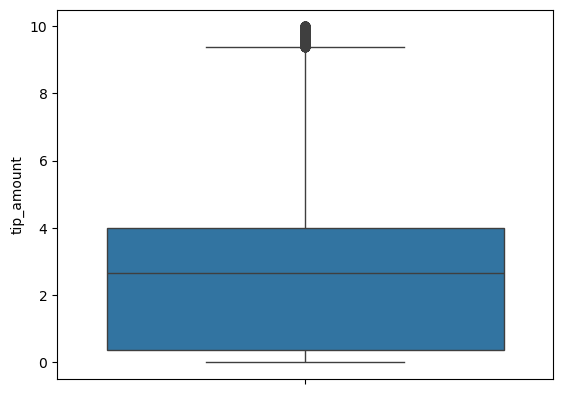

In [352]:
filtered_df_tip = final_df1[final_df1['tip_amount'] < 10]

# Plot
sns.boxplot(filtered_df_tip['tip_amount'])

plt.show()

In [353]:


# Plot
sns.boxplot(final_df1['payment_type'])

plt.show()

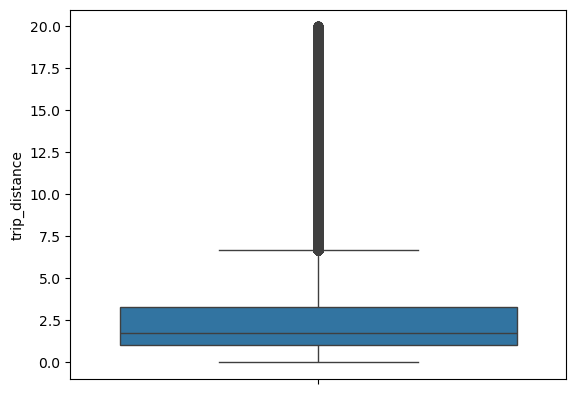

In [354]:
distance__filter_df = final_df1[final_df1['trip_distance'] < 20]
sns.boxplot(distance__filter_df['trip_distance'])

plt.show()

<Axes: ylabel='fare_amount'>

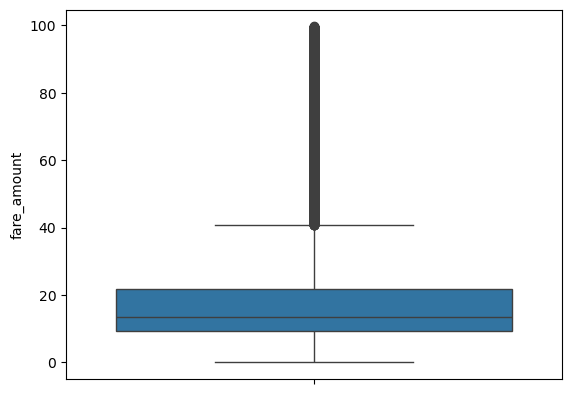

In [355]:
payment__filter_df = final_df1[final_df1['fare_amount'] < 100]
sns.boxplot(payment__filter_df['fare_amount'])

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [359]:
# remove passenger_count > 6
final_df1 = final_df1[final_df1['passenger_count'] <= 6]


In [360]:
#Entries where trip_distance is nearly 0 and fare_amount is more than 300
final_df1 = final_df1[~((final_df1['trip_distance'] <= 0.1) & (final_df1['fare_amount'] > 300))]


In [361]:
#Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
final_df1 = final_df1[~(
    (final_df1['trip_distance'] == 0) &
    (final_df1['fare_amount'] == 0) &
    (final_df1['PULocationID'] != final_df1['DOLocationID'])
)]


In [362]:
#Entries where trip_distance is more than 250 miles.
final_df1 = final_df1[final_df1['trip_distance'] <= 250]


In [363]:

#Entries where payment_type is 0 (there is no payment_type 0 defined in the data dictionary)
final_df1 = final_df1[final_df1['payment_type'] != 0]


In [364]:
# Continue with outlier handling

cols_to_clip = ['tip_amount', 'extra', 'tolls_amount', 'fare_amount', 'total_amount']
final_df1[cols_to_clip] = final_df1[cols_to_clip].clip(lower=0, upper=100)

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [366]:
final_df1.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'date',
 'hour',
 'combined_airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`
 ## Ans
  Variable	Type
VendorID	Categorical
tpep_pickup_datetime	Timestamp (can derive numerical or categorical features)
tpep_dropoff_datetime	Timestamp
passenger_count	Numerical
trip_distance	Numerical
RatecodeID	Categorical
PULocationID	Categorical
DOLocationID	Categorical
payment_type	Categorical
pickup_hour	Numerical
trip_duration	Numerical
All monetary fields (fare_amount to airport_fee)	Numerical


##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [371]:
# Find and show the hourly trends in taxi pickups

final_df1['hour'] = final_df1['tpep_pickup_datetime'].dt.hour
sns.countplot(x='hour', data=final_df1)
plt.title('Taxi Pickups by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.show()

In [372]:
# Find and show the daily trends in taxi pickups (days of the week)

final_df1['week'] = final_df1['tpep_pickup_datetime'].dt.dayofweek
sns.countplot(x='week', data=final_df1)
plt.title('Taxi Pickups by Day of week')
plt.xlabel('day of week')
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.xticks(ticks=range(7), labels=days)
plt.ylabel('Number of Pickups')
plt.show()


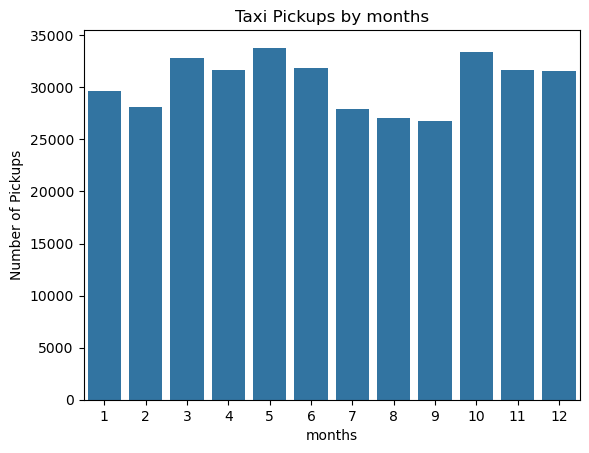

In [373]:
# Show the monthly trends in pickups

final_df1['month'] = final_df1['tpep_pickup_datetime'].dt.month
sns.countplot(x='month', data=final_df1)
plt.title('Taxi Pickups by months')
plt.xlabel('months')
plt.ylabel('Number of Pickups')
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [376]:
# Analyse the above parameters
#Total amount has the negative value ,dropped in negative value analysis.




In [377]:
final_df1[final_df1['tip_amount'] < 0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, date, hour, combined_airport_fee, week, month]
Index: []

[0 rows x 22 columns]

In [378]:
final_df1[final_df1['tip_amount'] == 0]


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
2              2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3              2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
10             2  2023-01-01 00:14:47   2023-01-01 00:20:18              1.0   
16             2  2023-01-01 00:56:42   2023-01-01 01:00:25              1.0   
...          ...                  ...                   ...              ...   
379252         1  2023-09-30 23:15:39   2023-09-30 23:25:12              3.0   
379253         2  2023-09-30 23:11:16   2023-09-30 23:27:54              1.0   
379254         1  2023-09-30 23:58:35   2023-10-01 00:41:08              1.0   
379264         2  2023-09-30 23:39:11   2023-10-01 00:05:50              2.0   
379266         2  2023-09-30 23:54:53   2023-10-01 00:08:11              4.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0                7.74         1.0           138           256             2   
2                1.44         1.0           237           141             2   
3                0.54         1.0           143           142             2   
10               0.78         1.0           237           229             2   
16               0.74         1.0           229           141             1   
...               ...         ...           ...           ...           ...   
379252           1.20         1.0           114            79             1   
379253           1.76         1.0           249           234             2   
379254          13.70         1.0           163           265             4   
379264           3.36         1.0            79           163             2   
379266           2.34         1.0           148           170             2   

        fare_amount  ...  tip_amount  tolls_amount  improvement_surcharge  \
0              32.4  ...         0.0          0.00                    1.0   
2              11.4  ...         0.0          0.00                    1.0   
3               6.5  ...         0.0          0.00                    1.0   
10              7.2  ...         0.0          0.00                    1.0   
16              5.8  ...         0.0          0.00                    1.0   
...             ...  ...         ...           ...                    ...   
379252         10.0  ...         0.0          0.00                    1.0   
379253         15.6  ...         0.0          0.00                    1.0   
379254         59.7  ...         0.0         18.25                    1.0   
379264         24.7  ...         0.0          0.00                    1.0   
379266         15.6  ...         0.0          0.00                    1.0   

        total_amount  congestion_surcharge        date  hour  \
0              41.15                   0.0  2023-01-01     0   
2              16.40                   2.5  2023-01-01     0   
3              11.50                   2.5  2023-01-01     0   
10             12.20                   2.5  2023-01-01     0   
16             10.80                   2.5  2023-01-01     0   
...              ...                   ...         ...   ...   
379252         15.00                   2.5  2023-09-30    23   
379253         20.60                   2.5  2023-09-30    23   
379254         82.95                   2.5  2023-09-30    23   
379264         29.70                   2.5  2023-09-30    23   
379266         20.60                   2.5  2023-09-30    23   

       combined_airport_fee  week  month  
0                      1.25     6      1  
2                      0.00     6      1  
3                      0.00     6      1  
10                     0.00     6      1  
16                     0.00     6      1  
...                     ...   ...    ...  
379252                 0.00     5      9  
379253                 0.00     5      9  
379254           

In [379]:
final_df1[final_df['fare_amount'] == 0]


C:\Users\gaurav\AppData\Local\Temp\ipykernel_19344\1090285039.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_df1[final_df['fare_amount'] == 0]


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
625            1  2023-01-01 19:16:54   2023-01-01 19:17:15              1.0   
7279           1  2023-01-09 09:25:20   2023-01-09 09:26:01              1.0   
9531           1  2023-01-11 16:47:59   2023-01-11 18:09:08              1.0   
10828          2  2023-01-12 19:13:41   2023-01-12 19:13:54              1.0   
12364          2  2023-01-14 04:18:47   2023-01-14 06:08:25              1.0   
...          ...                  ...                   ...              ...   
363515         2  2023-09-13 08:41:37   2023-09-13 08:53:16              1.0   
365252         1  2023-09-14 16:28:01   2023-09-14 16:30:12              1.0   
365932         2  2023-09-15 07:13:54   2023-09-15 07:25:31              1.0   
372650         2  2023-09-25 00:12:38   2023-09-25 01:07:42              1.0   
378551         1  2023-09-30 13:22:42   2023-09-30 13:33:41              1.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
625              0.00         2.0           261           261             3   
7279             0.00         1.0           145           145             2   
9531            53.20         5.0           132           265             3   
10828            0.00         1.0           264           264             1   
12364           68.16         1.0            78           265             2   
...               ...         ...           ...           ...           ...   
363515           1.04         1.0           234           164             2   
365252          11.30         1.0           138           138             3   
365932           0.00         1.0           138           138             2   
372650          24.18         4.0           138           265             2   
378551           2.00         5.0           142            48             3   

        fare_amount  ...  tip_amount  tolls_amount  improvement_surcharge  \
625             0.0  ...         0.0           0.0                    0.0   
7279            0.0  ...         0.0           0.0                    0.0   
9531            0.0  ...         0.0          21.3                    1.0   
10828           0.0  ...         0.0           0.0                    0.0   
12364           0.0  ...         0.0           0.0                    1.0   
...             ...  ...         ...           ...                    ...   
363515          0.0  ...         0.0           0.0                    1.0   
365252          0.0  ...         0.0           0.0                    0.0   
365932          0.0  ...         0.0           0.0                    1.0   
372650          0.0  ...         0.0           0.0                    1.0   
378551          0.0  ...         0.0           0.0                    1.0   

        total_amount  congestion_surcharge        date  hour  \
625             0.00                   0.0  2023-01-01    19   
7279            0.00                   0.0  2023-01-09     9   
9531           22.30                   0.0  2023-01-11    16   
10828           0.00                   0.0  2023-01-12    19   
12364           1.50                   0.0  2023-01-14     4   
...              ...                   ...         ...   ...   
363515          4.00                   2.5  2023-09-13     8   
365252          0.00                   0.0  2023-09-14    16   
365932          3.25                   0.0  2023-09-15     7   
372650          3.25                   0.0  2023-09-25     0   
378551          1.00                   0.0  2023-09-30    13   

       combined_airport_fee  week  month  
625                    0.00     6      1  
7279                   0.00     0      1  
9531                   0.00     2      1  
10828                  0.00     3      1  
12364                  0.00     5      1  
...                     ...   ...    ...  
363515                 0.00     2      9  
365252                 0.00     3      9  
365932           

In [380]:
final_df1[final_df1['trip_distance'] == 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
68             2  2023-01-01 01:34:06   2023-01-01 01:34:14              2.0   
87             1  2023-01-01 01:25:41   2023-01-01 01:25:45              1.0   
93             1  2023-01-01 01:26:38   2023-01-01 01:27:12              1.0   
94             2  2023-01-01 01:20:00   2023-01-01 01:20:02              4.0   
165            2  2023-01-01 03:18:36   2023-01-01 03:18:42              1.0   
...          ...                  ...                   ...              ...   
378577         2  2023-09-30 13:14:24   2023-09-30 13:14:37              3.0   
378846         2  2023-09-30 17:17:25   2023-09-30 17:36:25              1.0   
378974         1  2023-09-30 19:44:14   2023-09-30 19:44:36              1.0   
379165         1  2023-09-30 22:25:15   2023-09-30 22:25:19              1.0   
379210         2  2023-09-30 23:34:29   2023-09-30 23:49:06              1.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
68                0.0         5.0           265           265             1   
87                0.0         1.0           148           148             1   
93                0.0         5.0           229           229             1   
94                0.0         5.0           264           264             1   
165               0.0         1.0           113           113             2   
...               ...         ...           ...           ...           ...   
378577            0.0         2.0           246           246             2   
378846            0.0         1.0           264           264             1   
378974            0.0         1.0           168           168             2   
379165            0.0         1.0           152           152             1   
379210            0.0         1.0           264           264             1   

        fare_amount  ...  tip_amount  tolls_amount  improvement_surcharge  \
68             50.0  ...       10.20           0.0                    1.0   
87              3.0  ...       52.00           0.0                    1.0   
93              5.0  ...        0.00           0.0                    1.0   
94             45.0  ...        0.80           0.0                    1.0   
165             3.0  ...        0.00           0.0                    1.0   
...             ...  ...         ...           ...                    ...   
378577         70.0  ...        0.00           0.0                    1.0   
378846         15.6  ...        5.88           0.0                    1.0   
378974          3.0  ...        0.00           0.0                    1.0   
379165         34.5  ...        0.00           0.0                    1.0   
379210         12.8  ...        4.59           0.0                    1.0   

        total_amount  congestion_surcharge        date  hour  \
68             61.20                   0.0  2023-01-01     1   
87             60.00                   2.5  2023-01-01     1   
93              6.00                   0.0  2023-01-01     1   
94             46.80                   0.0  2023-01-01     1   
165             8.00                   2.5  2023-01-01     3   
...              ...                   ...         ...   ...   
378577         74.00                   2.5  2023-09-30    13   
378846         25.48                   2.5  2023-09-30    17   
378974          4.50                   0.0  2023-09-30    19   
379165         36.00                   0.0  2023-09-30    22   
379210         19.89                   0.0  2023-09-30    23   

       combined_airport_fee  week  month  
68                      0.0     6      1  
87                      0.0     6      1  
93                      0.0     6      1  
94                      0.0     6      1  
165                     0.0     6      1  
...                     ...   ...    ...  
378577                  0.0     5      9  
378846                  0.0     5      9  
378974           

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?
Yes, creating a copy of the DataFrame excluding zero values can be very beneficial, especially for exploratory data analysis and model training. Here's why and how you might approach it:

 Why remove zero values for some features?
Zeroes in fields like fare_amount, trip_distance, or passenger_count often indicate data entry issues or invalid trips, especially when:

trip_distance = 0 but pickup and dropoff locations are different.

fare_amount = 0 but trip_duration is > 0.

passenger_count = 0 (which is highly unlikely in a real-world scenario).

payment_type = 0 (undefined per your data dictionary).
tip_amount could be zero

These zeros can:

Skew your averages and distributions

Confuse data analysis , making them learn from invalid patterns

Impact downstream  like revenue, average fare per trip, etc.

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.




In [383]:

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

Short trips inside large hubs (like airports or stations) might be valid and charged a minimum fare.

If PULocationID == DOLocationID, a trip_distance of 0 could be realistic, not necessarily an error.

However, if the fare is also 0, or the trip duration is very high with 0 distance, it's suspicious.

So:

Keep zero-distance trips only if pickup and dropoff are the same AND other fields are reasonable (non-zero fare, short duration).

Drop zero-distance trips where pickup and dropoff are different or fare is 0.


SyntaxError: unterminated string literal (detected at line 7) (1191597900.py, line 7)

In [ ]:
# Filter logic
filtered_df = final_df1[
    (final_df1['fare_amount'] > 0) &
    (final_df1['payment_type'] != 0) & (final_df1['trip_distance'] > 0)
    
].copy()


In [384]:
filtered_df[filtered_df['trip_distance']==0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, date, hour, combined_airport_fee, week, month]
Index: []

[0 rows x 22 columns]

In [386]:
# Create a df with non zero entries for the selected parameters.
#filtered_df=filtered_df[filtered_df['passenger_count'] > 0]
#so filtered_df with non zero entries for selected parameter
filtered_df[filtered_df['passenger_count'] == 0]
filtered_df['passenger_count'].describe()

count    361720.000000
mean          1.383659
std           0.875740
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           6.000000
Name: passenger_count, dtype: float64

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [ ]:
filtered_df['tpep_pickup_datetime'].dt.month

In [388]:
filtered_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
5         1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           7.74         1.0           138           256             2   
1           1.24         1.0           161           237             1   
2           1.44         1.0           237           141             2   
3           0.54         1.0           143           142             2   
5           7.10         1.0           246            37             1   

   fare_amount  ...  tip_amount  tolls_amount  improvement_surcharge  \
0         32.4  ...        0.00           0.0                    1.0   
1          7.9  ...        2.58           0.0                    1.0   
2         11.4  ...        0.00           0.0                    1.0   
3          6.5  ...        0.00           0.0                    1.0   
5         34.5  ...        7.90           0.0                    1.0   

   total_amount  congestion_surcharge        date  hour combined_airport_fee  \
0         41.15                   0.0  2023-01-01     0                 1.25   
1         15.48                   2.5  2023-01-01     0                 0.00   
2         16.40                   2.5  2023-01-01     0                 0.00   
3         11.50                   2.5  2023-01-01     0                 0.00   
5         47.40                   2.5  2023-01-01     0                 0.00   

   week  month  
0     6      1  
1     6      1  
2     6      1  
3     6      1  
5     6      1  

[5 rows x 22 columns]

In [ ]:
# Group data by month and analyse monthly revenue
final_df_month = filtered_df.groupby('month')['total_amount'].sum().reset_index()
final_df_month.head()
filtered_df.groupby('month')['total_amount'].sum().reset_index()



In [390]:
sns.lineplot(data=final_df_month, x='month', y='total_amount', marker='o')

<Axes: xlabel='month', ylabel='total_amount'>

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [392]:
# Calculate proportion of each quarter
filtered_df['tpep_pickup_datetime'].dt.to_period('Q')



0         2023Q1
1         2023Q1
2         2023Q1
3         2023Q1
5         2023Q1
           ...  
379263    2023Q3
379264    2023Q3
379265    2023Q3
379266    2023Q3
379267    2023Q3
Name: tpep_pickup_datetime, Length: 361720, dtype: period[Q-DEC]

In [394]:
filtered_df['quarter'] = filtered_df['tpep_pickup_datetime'].dt.to_period('Q')


In [396]:
quarterly_revenue = filtered_df.groupby('quarter')['total_amount'].sum().reset_index()
filtered_df.groupby('quarter')['total_amount'].sum().reset_index()

quarter  total_amount
0  2023Q1    2443984.18
1  2023Q2    2749589.09
2  2023Q3    2325373.67
3  2023Q4    2751659.23

In [398]:
quarterly_revenue.rename(columns={'total_amount': 'quarterly_total'}, inplace=True)
yearly_revenue =quarterly_revenue['quarterly_total'].sum()
quarterly_revenue['proportion'] = quarterly_revenue['quarterly_total'] / yearly_revenue
quarterly_revenue.head()

quarter  quarterly_total  proportion
0  2023Q1       2443984.18    0.237959
1  2023Q2       2749589.09    0.267714
2  2023Q3       2325373.67    0.226411
3  2023Q4       2751659.23    0.267916

([<matplotlib.patches.Wedge at 0x185cb562630>,
 [Text(-0.7478450764760298, 0.8066769747492247, '2023Q1'),
  Text(-0.7932201280017284, -0.7621035549929693, '2023Q2'),
  Text(0.747334064967106, -0.8071504167995838, '2023Q3'),
  Text(0.820341816777925, 0.732829655271601, '2023Q4')],
 [Text(-0.40791549625965257, 0.44000562259048615, '23.8%'),
  Text(-0.4326655243645791, -0.41569284817798324, '26.8%'),
  Text(0.40763676270933047, -0.44026386370886383, '22.6%'),
  Text(0.447459172787959, 0.39972526651178236, '26.8%')])

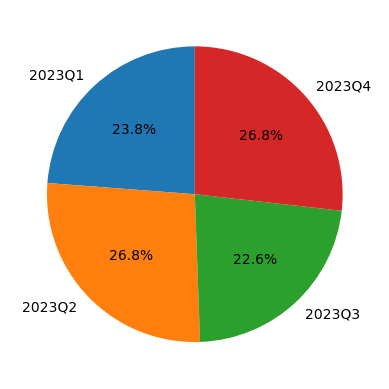

In [400]:
plt.pie(quarterly_revenue['proportion'], labels=quarterly_revenue['quarter'], autopct='%1.1f%%', startangle=90)

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [402]:
sns.boxplot(filtered_df['trip_distance'])

<Axes: ylabel='trip_distance'>

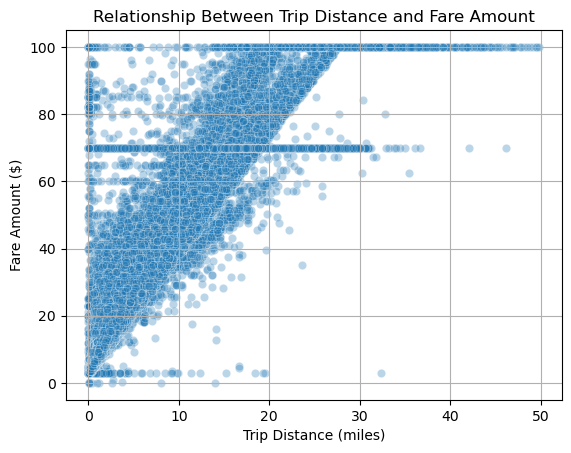

In [404]:
reasonable_df = filtered_df[filtered_df['trip_distance'] < 50]
sns.scatterplot(data=reasonable_df, x='trip_distance', y='fare_amount', alpha=0.3)
plt.title('Relationship Between Trip Distance and Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [406]:
filtered_df['trip_duration'] = (filtered_df['tpep_dropoff_datetime'] - filtered_df['tpep_pickup_datetime']).dt.total_seconds() / 60


In [408]:
filtered_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
5         1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           7.74         1.0           138           256             2   
1           1.24         1.0           161           237             1   
2           1.44         1.0           237           141             2   
3           0.54         1.0           143           142             2   
5           7.10         1.0           246            37             1   

   fare_amount  ...  improvement_surcharge  total_amount  \
0         32.4  ...                    1.0         41.15   
1          7.9  ...                    1.0         15.48   
2         11.4  ...                    1.0         16.40   
3          6.5  ...                    1.0         11.50   
5         34.5  ...                    1.0         47.40   

   congestion_surcharge        date  hour  combined_airport_fee  week month  \
0                   0.0  2023-01-01     0                  1.25     6     1   
1                   2.5  2023-01-01     0                  0.00     6     1   
2                   2.5  2023-01-01     0                  0.00     6     1   
3                   2.5  2023-01-01     0                  0.00     6     1   
5                   2.5  2023-01-01     0                  0.00     6     1   

   quarter  trip_duration  
0   2023Q1      15.950000  
1   2023Q1       5.083333  
2   2023Q1      10.550000  
3   2023Q1       5.416667  
5   2023Q1      33.616667  

[5 rows x 24 columns]

In [410]:
filtered_df1 = filtered_df[(filtered_df['trip_duration'] > 0) & (filtered_df['trip_duration'] < 180)]
filtered_df1['trip_duration'].describe()

count    361372.000000
mean         16.297742
std          13.058288
min           0.016667
25%           7.700000
50%          12.600000
75%          20.450000
max         177.566667
Name: trip_duration, dtype: float64

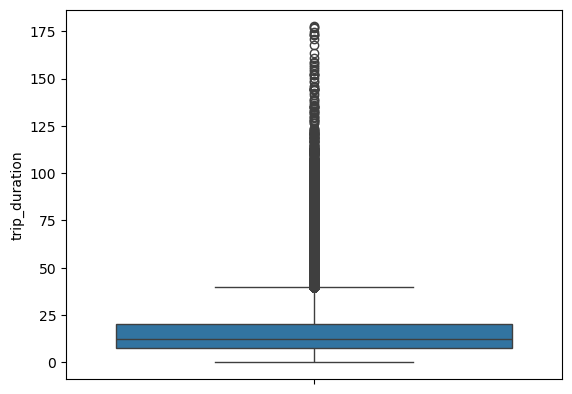

In [412]:
sns.boxplot(filtered_df1['trip_duration'])
plt.show()

In [414]:
# Show relationship between fare and trip duration
# Correlation calculations
corr1 = filtered_df1[['fare_amount', 'trip_duration']].corr().iloc[0,1]


print("Correlation between fare amount and trip duration:", round(corr1, 3))




Correlation between fare amount and trip duration: 0.866


Text(0, 0.5, 'Fare Amount')

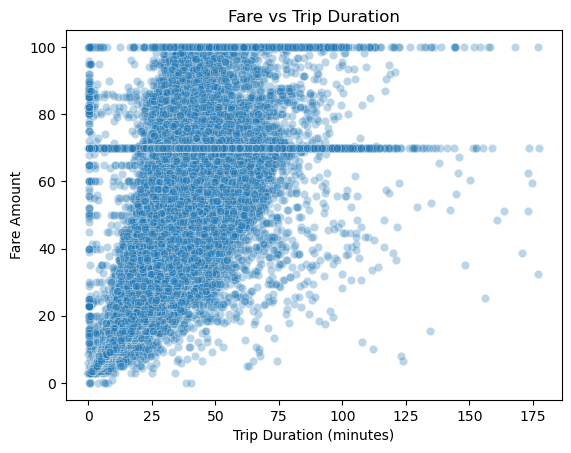

In [416]:
# Fare vs Duration

sns.scatterplot(x='trip_duration', y='fare_amount', data=filtered_df1, alpha=0.3)
plt.title('Fare vs Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount')

Text(0.5, 0, 'Fare Amount')

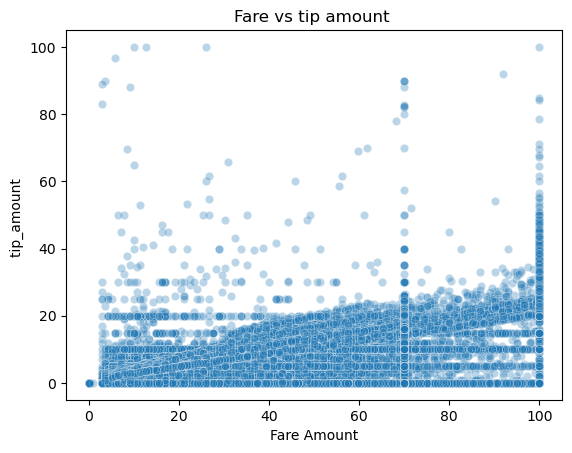

In [418]:
#fare and tips
sns.scatterplot(y='tip_amount', x='fare_amount', data=filtered_df1, alpha=0.3)
plt.title('Fare vs tip amount ')
plt.ylabel('tip_amount ')
plt.xlabel('Fare Amount')

In [420]:
# Show relationship between fare and number of passengers
corr2 = filtered_df1[['fare_amount', 'passenger_count']].corr().iloc[0,1]
print("Correlation between fare amount and number of passengers:", round(corr2, 3))

Correlation between fare amount and number of passengers: 0.044


Text(0, 0.5, 'Fare Amount')

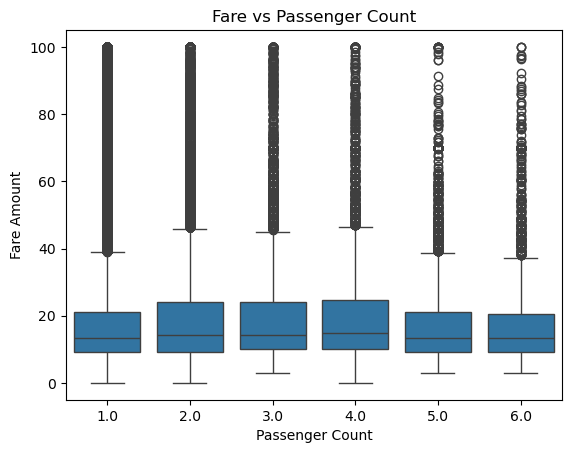

In [422]:
# Fare vs Passenger Count

sns.boxplot(x='passenger_count', y='fare_amount', data=filtered_df1)
plt.title('Fare vs Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount')

C:\Users\gaurav\AppData\Local\Temp\ipykernel_19344\3950766175.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=final_df1, x='passenger_count', palette='viridis')


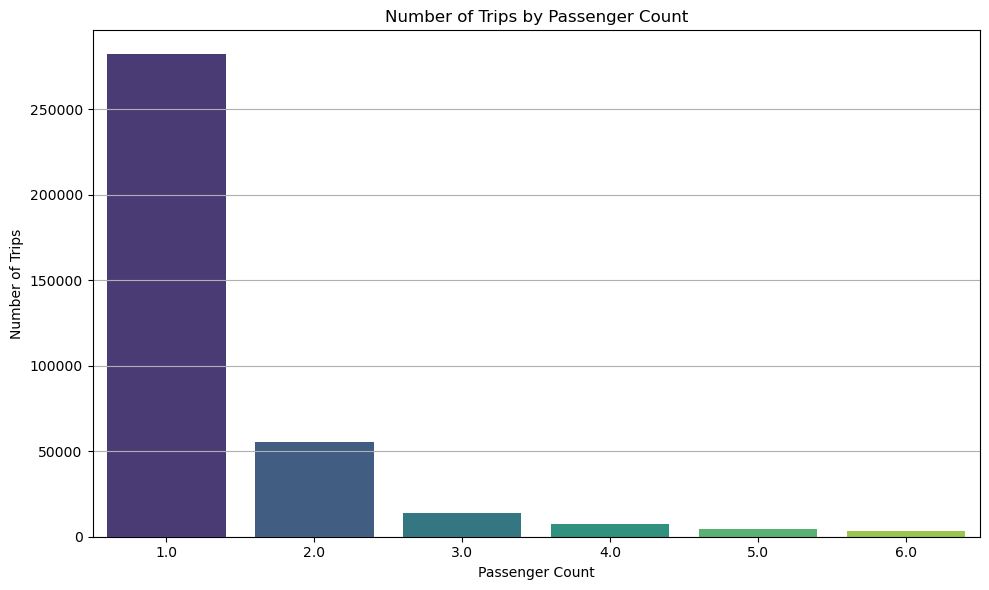

In [424]:
plt.figure(figsize=(10, 6))
sns.countplot(data=final_df1, x='passenger_count', palette='viridis')
plt.title("Number of Trips by Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Number of Trips")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [426]:
# Show relationship between tip and trip distance
corr3 = filtered_df1[['tip_amount', 'trip_distance']].corr().iloc[0,1]
print("Correlation between tip amount and trip distance:", round(corr3, 3))

Correlation between tip amount and trip distance: 0.591


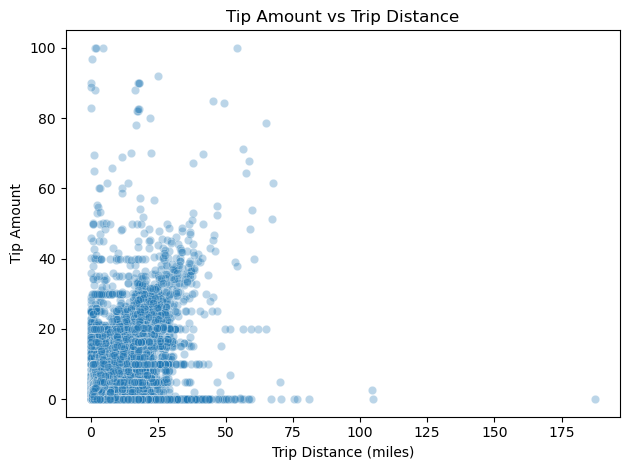

In [428]:
# Tip vs Distance

sns.scatterplot(x='trip_distance', y='tip_amount', data=filtered_df1, alpha=0.3)
plt.title('Tip Amount vs Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount')

plt.tight_layout()
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [ ]:
# Analyse the distribution of different payment types (payment_type).
filtered_df1['payment_type'].value_counts()



<Axes: xlabel='payment_type', ylabel='Count'>

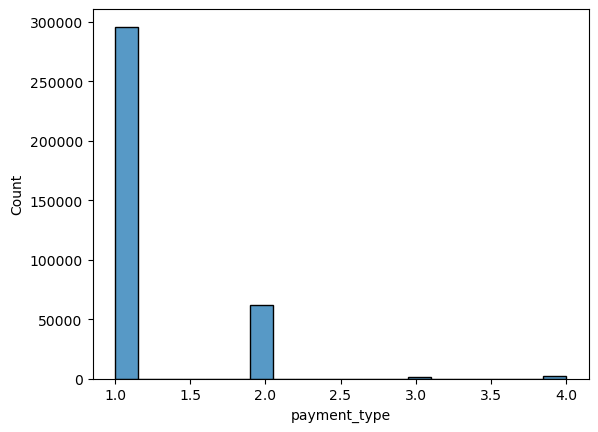

In [430]:
sns.histplot (data=filtered_df,x= 'payment_type')

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [432]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file(r'C:\Users\gaurav\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\taxi_zones\taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [ ]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [434]:
# Merge zones and trip records using locationID and PULocationID

merged_df = pd.merge(filtered_df1, zones, left_on='PULocationID', right_on='LocationID')
merged_df['zone'].value_counts()

zone
JFK Airport                  18888
Upper East Side South        17263
Midtown Center               17028
Upper East Side North        15440
Midtown East                 13140
                             ...  
Ocean Parkway South              1
Forest Park/Highland Park        1
Van Cortlandt Park               1
Willets Point                    1
South Beach/Dongan Hills         1
Name: count, Length: 237, dtype: int64

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [436]:
# Group data by location and calculate the number of trips
location_trip_counts = filtered_df['PULocationID'].value_counts().reset_index()
location_trip_counts.columns = ['PULocationID', 'trip_count']
top_locations = location_trip_counts.sort_values(by='trip_count', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_locations, x='PULocationID', y='trip_count', palette='viridis')
plt.title('Top 10 Pickup Locations by Trip Count')
plt.xlabel('Pickup Location ID')
plt.ylabel('Number of Trips')
plt.tight_layout()
plt.show()

C:\Users\gaurav\AppData\Local\Temp\ipykernel_19344\2242534251.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_locations, x='PULocationID', y='trip_count', palette='viridis')


In [438]:
trip_counts = df.groupby('PULocationID').size().reset_index(name='NumberOfTrips')

trip_counts.sort_values(by='NumberOfTrips', ascending=False).head(10).reset_index()



index  PULocationID  NumberOfTrips
0    125           132         155645
1    230           237         131839
2    154           161         121194
3    229           236         117963
4    131           138         100026
5    155           162          97208
6    179           186          95319
7    223           230          89834
8    135           142          87978
9    163           170          81338

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [440]:
# Merge trip counts back to the zones GeoDataFrame
trip_counts_by_location = merged_df['LocationID'].value_counts().reset_index()
trip_counts_by_location.columns = ['LocationID', 'trip_count']
zone_trip = zones.merge(trip_counts_by_location, on='LocationID', how='left')



The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

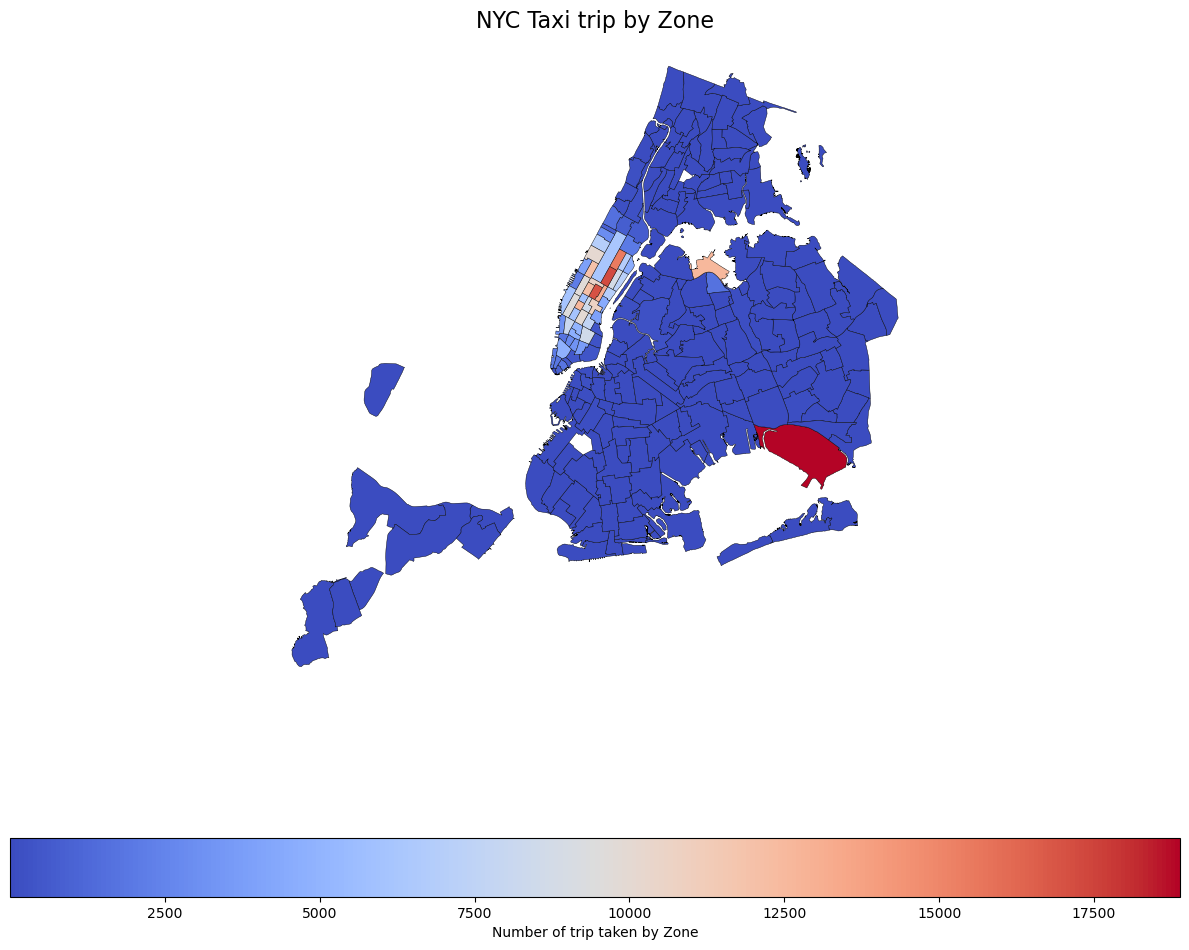

In [442]:
import matplotlib.pyplot as plt

# Step 1: Create the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Step 2: Plot the GeoDataFrame with trip counts
zone_trip.plot(
    column='trip_count',
    ax=ax,
    cmap='coolwarm',
    legend=True,
    legend_kwds={
        'label': "Number of trip taken by Zone",
        'orientation': "horizontal"
    },
    edgecolor='black',
    linewidth=0.3
)

# Step 3: Customize the plot
ax.set_title("NYC Taxi trip by Zone", fontsize=16)
ax.axis('off')

# Step 4: Show the plot
plt.tight_layout()
plt.show()

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

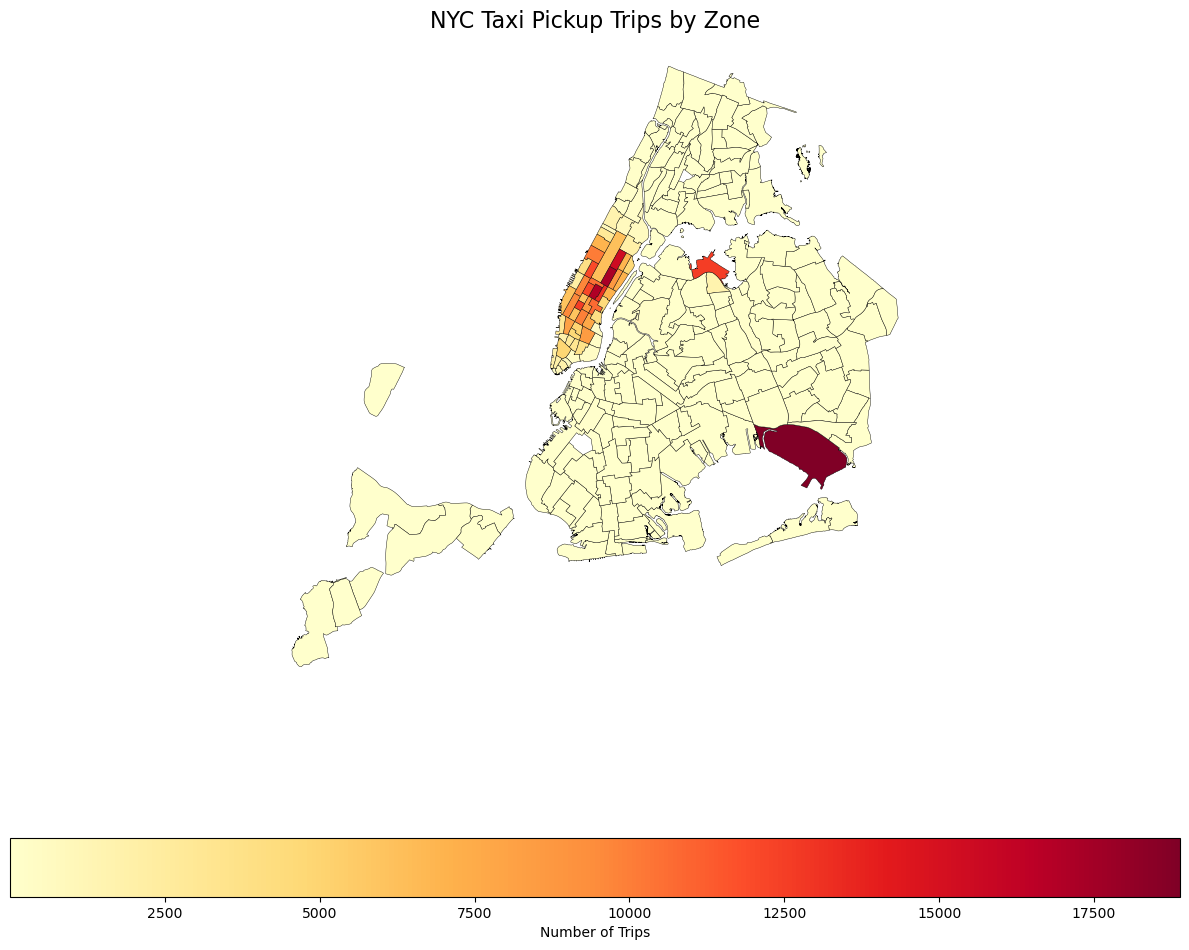

In [444]:
# Step 1: Group by zone and count the number of trips
zone_trip_counts = merged_df['zone'].value_counts().reset_index()
zone_trip_counts.columns = ['zone', 'trip_count']

# Step 2: Merge trip counts with the zones GeoDataFrame
zones_with_trips = zones.merge(zone_trip_counts, on='zone', how='left')

# Step 3: Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the GeoDataFrame with color coding based on 'trip_count'
zones_with_trips.plot(
    column='trip_count',           # The column to base the color coding on
    ax=ax,                         # The axis to plot on
    cmap='YlOrRd',                 # Color map (Yellow → Orange → Red)
    legend=True,                   # Show the legend
    legend_kwds={'label': "Number of Trips", 'orientation': 'horizontal'}, # Customize the legend
    edgecolor='black',             # Black borders around zones
    linewidth=0.3                  # Thin borders
)

# Step 4: Add title and remove axis labels
ax.set_title("NYC Taxi Pickup Trips by Zone", fontsize=16)
ax.axis('off')  # Hide the axes

# Step 5: Display the map
plt.tight_layout()
plt.show()

In [446]:
# can you try displaying the zones DF sorted by the number of trips?

sorted_zone_trip_counts = zone_trip_counts.sort_values(by='trip_count', ascending=False)
print(sorted_zone_trip_counts)

                          zone  trip_count
0                  JFK Airport       18888
1        Upper East Side South       17263
2               Midtown Center       17028
3        Upper East Side North       15440
4                 Midtown East       13140
..                         ...         ...
232        Ocean Parkway South           1
233  Forest Park/Highland Park           1
234         Van Cortlandt Park           1
235              Willets Point           1
236   South Beach/Dongan Hills           1

[237 rows x 2 columns]


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
merged_df[merged_df['trip_distance']==0]

In [448]:
# Find routes which have the slowest speeds at different times of the day


merged_df['speed']=merged_df['trip_distance']/merged_df['trip_duration']
route_speeds = merged_df.groupby(['PULocationID', 'DOLocationID'])['speed'].mean().reset_index()
slow_routes = route_speeds.sort_values(by='speed', ascending=True)
pickup_zones = zones[['LocationID', 'zone']].rename(columns={'LocationID': 'PULocationID', 'zone': 'pickup_zone'})
dropoff_zones = zones[['LocationID', 'zone']].rename(columns={'LocationID': 'DOLocationID', 'zone': 'dropoff_zone'})
slow_routes = slow_routes.merge(pickup_zones, on='PULocationID', how='left')
slow_routes = slow_routes.merge(dropoff_zones, on='DOLocationID', how='left')

print(slow_routes.head(10))

   PULocationID  DOLocationID     speed                 pickup_zone  \
0           134           265  0.001231                 Kew Gardens   
1           220           236  0.001615  Spuyten Duyvil/Kingsbridge   
2           128           128  0.001923            Inwood Hill Park   
3           231           247  0.002383        TriBeCa/Civic Center   
4            42            89  0.003617        Central Harlem North   
5            28            53  0.004386     Briarwood/Jamaica Hills   
6             3             3  0.008817     Allerton/Pelham Gardens   
7            67           122  0.012064               Dyker Heights   
8            14           125  0.012213                   Bay Ridge   
9           196            95  0.012632                   Rego Park   

              dropoff_zone  
0                      NaN  
1    Upper East Side North  
2         Inwood Hill Park  
3           West Concourse  
4     Flatbush/Ditmas Park  
5            College Point  
6  Allerton/Pel

In [450]:
merged_df['trip_duration'].describe()

count    358207.000000
mean         16.293653
std          13.052997
min           0.016667
25%           7.700000
50%          12.600000
75%          20.450000
max         177.566667
Name: trip_duration, dtype: float64

In [452]:
merged_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           7.74         1.0           138           256             2   
1           1.24         1.0           161           237             1   
2           1.44         1.0           237           141             2   
3           0.54         1.0           143           142             2   
4           7.10         1.0           246            37             1   

   fare_amount  ...  quarter  trip_duration  OBJECTID  Shape_Leng  Shape_Area  \
0         32.4  ...   2023Q1      15.950000       138    0.107467    0.000537   
1          7.9  ...   2023Q1       5.083333       161    0.035804    0.000072   
2         11.4  ...   2023Q1      10.550000       237    0.042213    0.000096   
3          6.5  ...   2023Q1       5.416667       143    0.054180    0.000151   
4         34.5  ...   2023Q1      33.616667       246    0.069467    0.000281   

                        zone  LocationID    borough  \
0          LaGuardia Airport         138     Queens   
1             Midtown Center         161  Manhattan   
2      Upper East Side South         237  Manhattan   
3        Lincoln Square West         143  Manhattan   
4  West Chelsea/Hudson Yards         246  Manhattan   

                                            geometry     speed  
0  MULTIPOLYGON (((1019904.219 225677.983, 102031...  0.485266  
1  POLYGON ((991081.026 214453.698, 990952.644 21...  0.243934  
2  POLYGON ((993633.442 216961.016, 993507.232 21...  0.136493  
3  POLYGON ((989338.1 223572.253, 989368.225 2235...  0.099692  
4  POLYGON ((983031.177 217138.506, 983640.32 216...  0.211205  

[5 rows x 32 columns]

In [454]:
sns.scatterplot(data=merged_df,x='trip_duration',y='trip_distance')

<Axes: xlabel='trip_duration', ylabel='trip_distance'>

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [456]:
# Visualise the number of trips per hour and find the busiest hour

hourly_trip_counts = merged_df['hour'].value_counts().sort_index()

scaling_factor = 1 / 0.05  # or 20
hourly_trip_counts_scaled = hourly_trip_counts * scaling_factor

# Put in DataFrame
hourly_scaled_df = hourly_trip_counts_scaled.reset_index()
hourly_scaled_df.columns = ['Hour', 'Estimated Number of Trips']

# Show top busy hours
top_hours = hourly_scaled_df.sort_values(by='Estimated Number of Trips', ascending=False).head(5)
print("Top 5 Busiest Hours:")
print(top_hours)

Top 5 Busiest Hours:
    Hour  Estimated Number of Trips
18    18                   506000.0
17    17                   483540.0
19    19                   455080.0
15    15                   447120.0
16    16                   446420.0


<Axes: xlabel='hour', ylabel='count'>

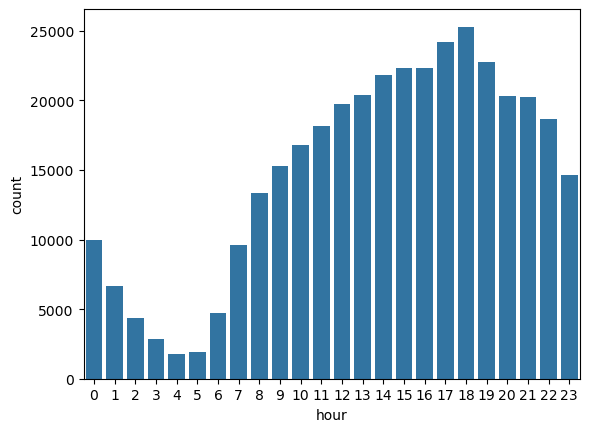

In [458]:
sns.countplot(data=merged_df,x='hour')

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [460]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
hourly_trip_counts = merged_df['hour'].value_counts().sort_index()

scaling_factor = 1 / 0.01  # or 20
hourly_trip_counts_scaled = hourly_trip_counts * scaling_factor

# Put in DataFrame
hourly_scaled_df = hourly_trip_counts_scaled.reset_index()
hourly_scaled_df.columns = ['Hour', 'Estimated Number of Trips']

# Show top busy hours
top_hours = hourly_scaled_df.sort_values(by='Estimated Number of Trips', ascending=False).head(5)
print("Top 5 Busiest Hours:")
print(top_hours)




Top 5 Busiest Hours:
    Hour  Estimated Number of Trips
18    18                  2530000.0
17    17                  2417700.0
19    19                  2275400.0
15    15                  2235600.0
16    16                  2232100.0


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

In [464]:
merged_df['week'] = merged_df['tpep_pickup_datetime'].dt.dayofweek
merged_df.groupby('week')['hour'].value_counts()

week  hour
0     18      3302
      17      3245
      15      2999
      16      2968
      14      2920
              ... 
6     8        893
      7        581
      4        564
      6        368
      5        242
Name: count, Length: 168, dtype: int64

In [468]:
merged_df['day_type'] = merged_df['week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

In [470]:
hourly_comparison = merged_df.groupby(['day_type', 'hour']).size().reset_index(name='trip_count')
hourly_comparison.head()

day_type  hour  trip_count
0  Weekday     0        4984
1  Weekday     1        2506
2  Weekday     2        1357
3  Weekday     3         835
4  Weekday     4         777

In [472]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_comparison, x='hour', y='trip_count', hue='day_type', marker='o', palette='Set2')
plt.title('Hourly Taxi Traffic: Weekday vs Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips (Sampled)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title='Day Type')
plt.tight_layout()
plt.show()


**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [474]:
top_10_zone_hour_pickups = (
    merged_df.groupby(['zone', 'hour'])
    .size()
    .reset_index(name='trip_count')
    .sort_values(by='trip_count', ascending=False)
    .head(10)
)

In [476]:
# Find top 10 pickup and dropoff zones
top_10_zone_hour_pickups.head(10)


zone  hour  trip_count
1911         Midtown Center    18        1484
1910         Midtown Center    17        1473
2845  Upper East Side South    17        1359
1429            JFK Airport    22        1353
1422            JFK Airport    15        1332
2843  Upper East Side South    15        1320
1909         Midtown Center    16        1318
1912         Midtown Center    19        1309
2819  Upper East Side North    15        1294
1426            JFK Airport    19        1289

In [576]:
top_10_zone_hour_drop = (
    merged_df.groupby(['do_zone', 'hour'])
    .size()
    .reset_index(name='trip_count')
    .sort_values(by='trip_count', ascending=False)
    .head(10)
)

In [578]:
top_10_zone_hour_drop.head(10)


do_zone  hour  trip_count
4439  Upper East Side South    12        1212
4418  Upper East Side North    15        1211
4421  Upper East Side North    18        1187
4445  Upper East Side South    18        1181
4420  Upper East Side North    17        1168
4419  Upper East Side North    16        1168
4417  Upper East Side North    14        1162
4442  Upper East Side South    15        1152
4444  Upper East Side South    17        1152
4440  Upper East Side South    13        1139

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [478]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# Step 1: Rename zone column for dropoff merge to avoid overwriting pickup zone
taxi_zone_do = zones[['LocationID', 'zone']].rename(columns={
    'zone': 'do_zone',
    'LocationID': 'DOLocationID'
})

# Step 2: Merge to add dropoff zone info
merged_df = merged_df.merge(taxi_zone_do, on='DOLocationID', how='left')


In [480]:
pickup_counts = merged_df['zone'].value_counts().rename('pickup_count')
dropoff_counts = merged_df['do_zone'].value_counts().rename('dropoff_count')

In [482]:
zone_counts = pd.concat([pickup_counts, dropoff_counts], axis=1).fillna(0)

In [486]:
zone_counts['pickup_drop_ratio'] = zone_counts['pickup_count'] / zone_counts['dropoff_count']

In [488]:
top_10_ratios = zone_counts.sort_values('pickup_drop_ratio', ascending=False).head(10)
bottom_10_ratios = zone_counts.sort_values('pickup_drop_ratio', ascending=True).head(10)

print("Top 10 zones by pickup/dropoff ratio:")
print(top_10_ratios)

print("\nBottom 10 zones by pickup/dropoff ratio:")
print(bottom_10_ratios)

Top 10 zones by pickup/dropoff ratio:
                              pickup_count  dropoff_count  pickup_drop_ratio
East Elmhurst                       1642.0            181           9.071823
JFK Airport                        18928.0           3786           4.999472
LaGuardia Airport                  12623.0           4238           2.978528
Penn Station/Madison Sq West       12545.0           8079           1.552791
Central Park                        6210.0           4446           1.396761
West Village                        8123.0           5976           1.359270
Greenwich Village South             4690.0           3475           1.349640
Midtown East                       13142.0          10339           1.271109
Midtown Center                     17029.0          14192           1.199901
Union Sq                            9901.0           8331           1.188453

Bottom 10 zones by pickup/dropoff ratio:
                                     pickup_count  dropoff_count  \
Oakwo

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [490]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_pickups = merged_df[(merged_df['hour'] >= 23) | (merged_df['hour'] <= 5)]
night_zone_hourly = night_pickups.groupby(['zone', 'hour']).size().reset_index(name='pickup_count')
night_zone_hourly_drop= night_pickups.groupby(['do_zone', 'hour']).size().reset_index(name='drop_count')
night_zone_hourly.head(10)


zone  hour  pickup_count
0  Allerton/Pelham Gardens     4             1
1            Alphabet City     0            39
2            Alphabet City     1            55
3            Alphabet City     2            43
4            Alphabet City     3            29
5            Alphabet City     4             6
6            Alphabet City     5             1
7            Alphabet City    23            21
8  Arrochar/Fort Wadsworth     1             1
9  Arrochar/Fort Wadsworth     2             1

In [492]:
top_night_zones = night_pickups['zone'].value_counts().head(10).reset_index()
top_night_zones.columns = ['zone', 'pickup_count']

In [494]:
top_night_zones_drop = night_pickups['do_zone'].value_counts().head(10).reset_index()
top_night_zones_drop.columns = ['do_zone', 'drop_count']

In [496]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_night_zones, x='pickup_count', y='zone', palette='viridis')
plt.title("Top 10 Night Pickup Zones (11 PM to 5 AM)")
plt.xlabel("Number of Pickups")
plt.ylabel("Zone")
plt.tight_layout()
plt.show()

C:\Users\gaurav\AppData\Local\Temp\ipykernel_19344\120766683.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_night_zones, x='pickup_count', y='zone', palette='viridis')


In [498]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_night_zones_drop, x='drop_count', y='do_zone', palette='viridis')
plt.title("Top 10 Night drop Zones (11 PM to 5 AM)")
plt.xlabel("Number of drop")
plt.ylabel("Zone")
plt.tight_layout()
plt.show()

C:\Users\gaurav\AppData\Local\Temp\ipykernel_19344\1819276360.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_night_zones_drop, x='drop_count', y='do_zone', palette='viridis')


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [502]:
# Filter for night hours (11 PM to 5 AM)

day_pickups = merged_df[(merged_df['hour'] < 23) | (merged_df['hour'] > 5)]
night_amount_hourly = night_pickups.groupby(['total_amount', 'hour']).size().reset_index(name='pickup_count')
day_amount_hourly = day_pickups.groupby(['total_amount', 'hour']).size().reset_index(name='pickup_count')
day_amount= day_pickups['total_amount'].sum()
night_amount= night_pickups['total_amount'].sum()

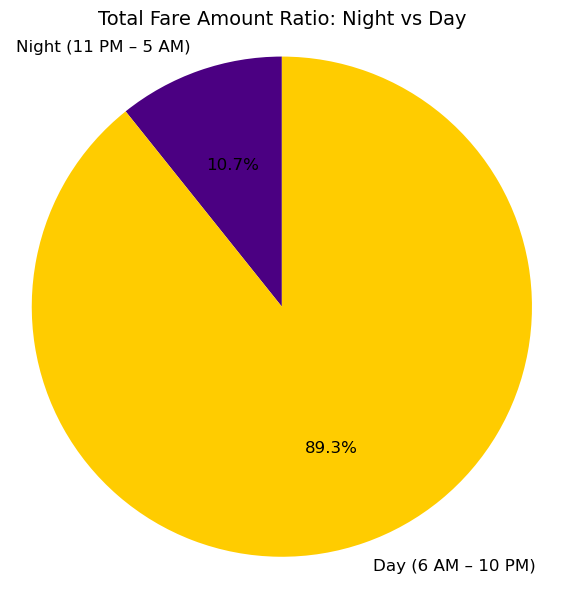

In [504]:
labels = ['Night (11 PM – 5 AM)', 'Day (6 AM – 10 PM)']
amounts = [night_amount, day_amount]
colors = ['#4B0082', '#FFCC00']

# Plot the pie chart
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.pie(amounts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 12})
plt.title('Total Fare Amount Ratio: Night vs Day', fontsize=14)
plt.axis('equal')  # Make the pie chart a circle
plt.tight_layout()
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [506]:
# Analyse the fare per mile per passenger for different passenger counts

df_valid = merged_df[(merged_df['trip_distance'] > 0) & (merged_df['passenger_count'] > 0)]
df_valid['fare_per_mile_per_passenger'] = df_valid['fare_amount'] / (df_valid['trip_distance'] * df_valid['passenger_count'])
avg_fare_per_group = df_valid.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()
avg_fare_per_group['fare_per_mile_per_passenger'] = avg_fare_per_group['fare_per_mile_per_passenger'].round(2)
print (avg_fare_per_group)


   passenger_count  fare_per_mile_per_passenger
0              1.0                        10.51
1              2.0                         6.35
2              3.0                         4.16
3              4.0                         4.16
4              5.0                         1.57
5              6.0                         1.29


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [540]:
# Compare the average fare per mile for different days and for different times of the day

valid_trips = merged_df[merged_df['trip_distance'] > 0].copy()
valid_trips['fare_per_mile'] = valid_trips['fare_amount'] / valid_trips['trip_distance']
avg_fare_by_hour = valid_trips.groupby('hour')['fare_per_mile'].mean().reset_index()
avg_fare_by_day = valid_trips.groupby('week')['fare_per_mile'].mean().reset_index()


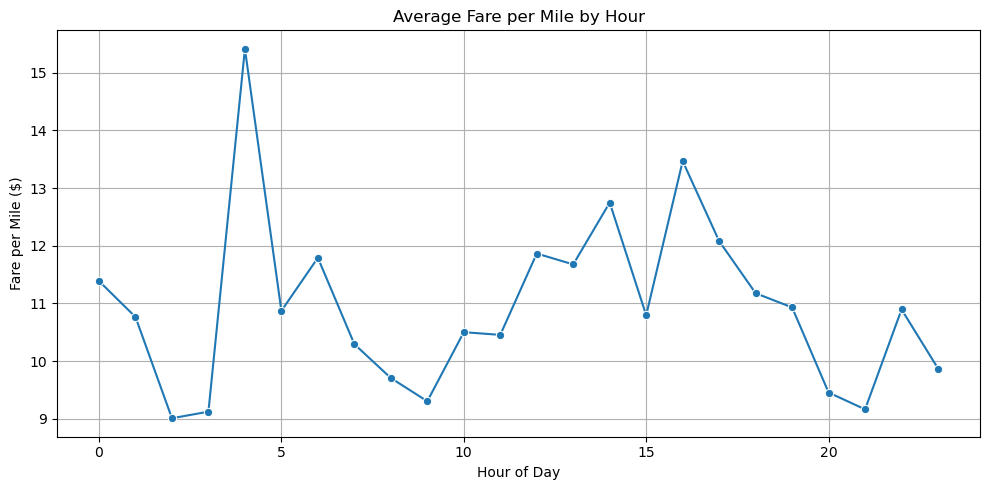

In [510]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_fare_by_hour, x='hour', y='fare_per_mile', marker='o')
plt.title('Average Fare per Mile by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Fare per Mile ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\gaurav\AppData\Local\Temp\ipykernel_19344\2513125856.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_fare_by_day, x='week', y='fare_per_mile', palette='mako')


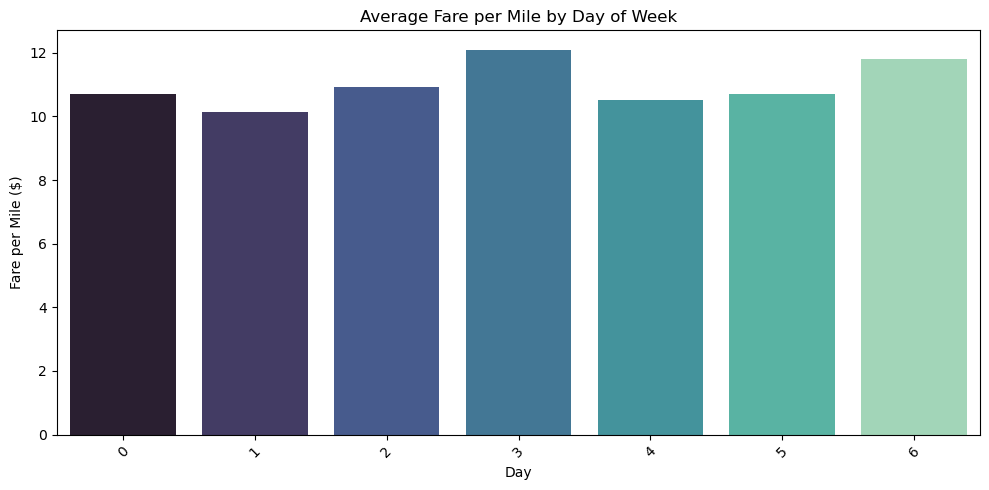

In [512]:

plt.figure(figsize=(10, 5))
sns.barplot(data=avg_fare_by_day, x='week', y='fare_per_mile', palette='mako')
plt.title('Average Fare per Mile by Day of Week')
plt.xlabel('Day')
plt.ylabel('Fare per Mile ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [514]:
# Compare fare per mile for different vendors

avg_fare_by_vendor = valid_trips.groupby('VendorID')['fare_per_mile'].mean().reset_index()

C:\Users\gaurav\AppData\Local\Temp\ipykernel_19344\1431561138.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_fare_by_vendor, x='VendorID', y='fare_per_mile', palette='mako')


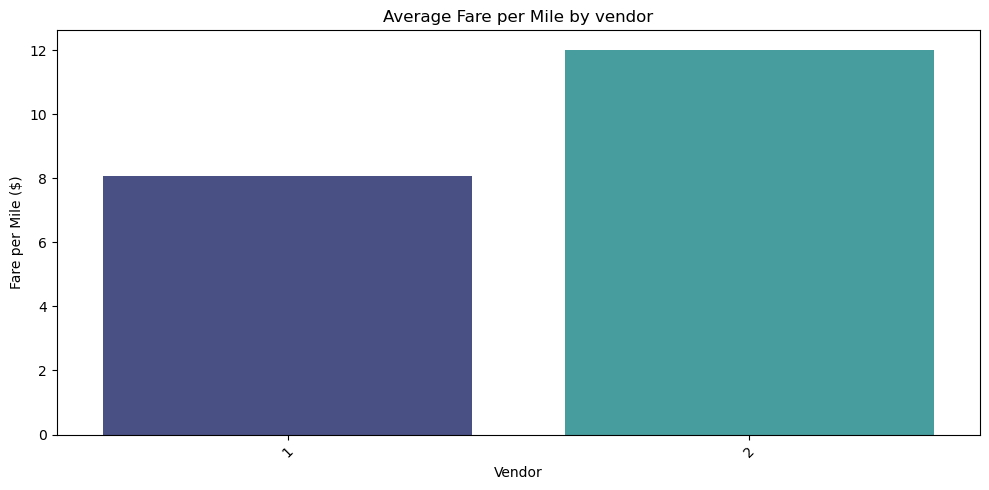

In [516]:
plt.figure(figsize=(10, 5))
sns.barplot(data=avg_fare_by_vendor, x='VendorID', y='fare_per_mile', palette='mako')
plt.title('Average Fare per Mile by vendor')
plt.xlabel('Vendor')
plt.ylabel('Fare per Mile ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


C:\Users\gaurav\AppData\Local\Temp\ipykernel_19344\2918862907.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = valid_trips.groupby(['distance_bin', 'VendorID'])['fare_per_mile'].mean().reset_index()


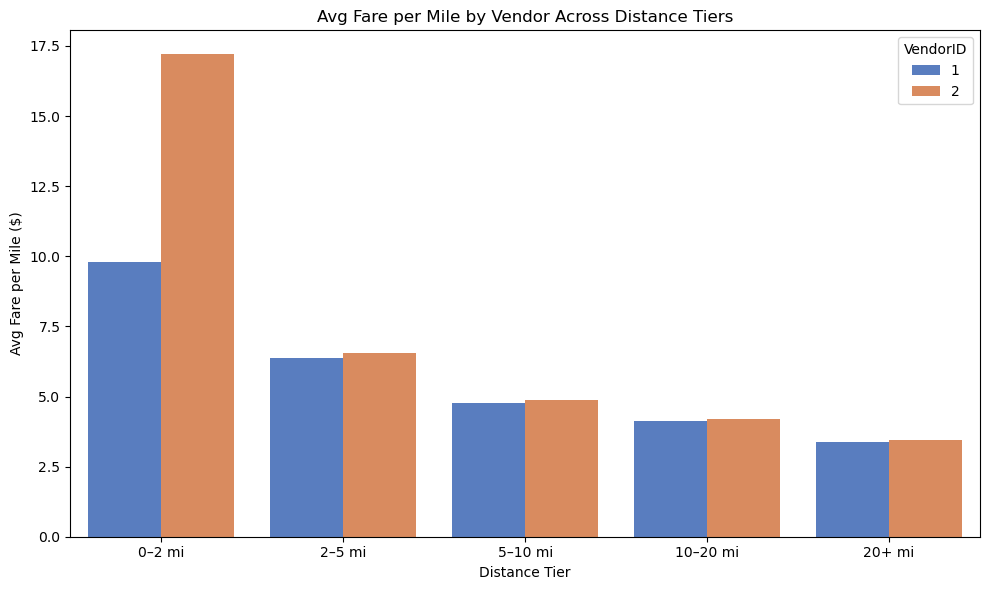

In [518]:
# Defining distance tiers
bins = [0, 2, 5, 10, 20, float('inf')]
labels = ['0–2 mi', '2–5 mi', '5–10 mi', '10–20 mi', '20+ mi']
valid_trips['distance_bin'] = pd.cut(valid_trips['trip_distance'], bins=bins, labels=labels)
valid_trips['fare_per_mile'] = valid_trips['fare_amount'] / valid_trips['trip_distance']

# Step 3: Group by distance bin and VendorID
grouped = valid_trips.groupby(['distance_bin', 'VendorID'])['fare_per_mile'].mean().reset_index()

# Step 4: Plot the comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='distance_bin', y='fare_per_mile', hue='VendorID', palette='muted')
plt.title('Avg Fare per Mile by Vendor Across Distance Tiers')
plt.xlabel('Distance Tier')
plt.ylabel('Avg Fare per Mile ($)')
plt.tight_layout()
plt.show()




##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [542]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

valid_trips['tip_percentage'] = (valid_trips['tip_amount'] / valid_trips['fare_amount']) * 100

valid_trips = valid_trips[valid_trips['tip_percentage'] <= 100]


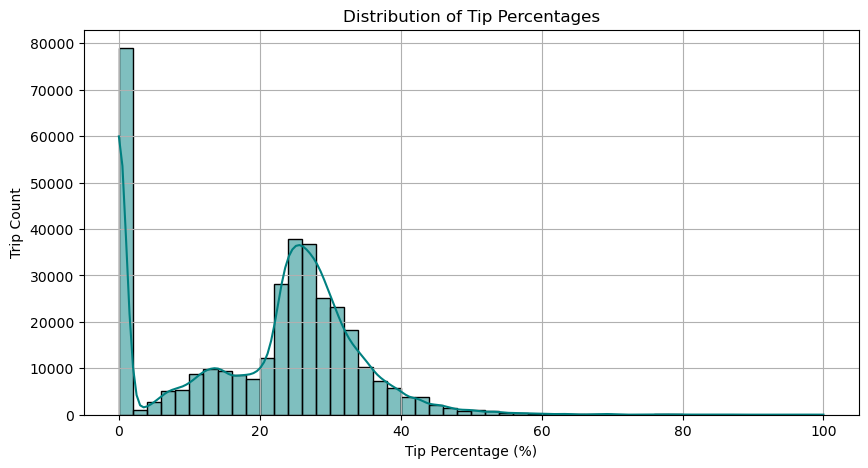

In [522]:

plt.figure(figsize=(10, 5))
sns.histplot(valid_trips['tip_percentage'], bins=50, kde=True, color='teal')
plt.title('Distribution of Tip Percentages')
plt.xlabel('Tip Percentage (%)')
plt.ylabel('Trip Count')
plt.grid(True)
plt.show()


C:\Users\gaurav\AppData\Local\Temp\ipykernel_19344\3493596943.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tip_distance = valid_trips.groupby('distance_bin')['tip_percentage'].mean().reset_index()
C:\Users\gaurav\AppData\Local\Temp\ipykernel_19344\3493596943.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tip_distance, x='distance_bin', y='tip_percentage', palette='coolwarm')


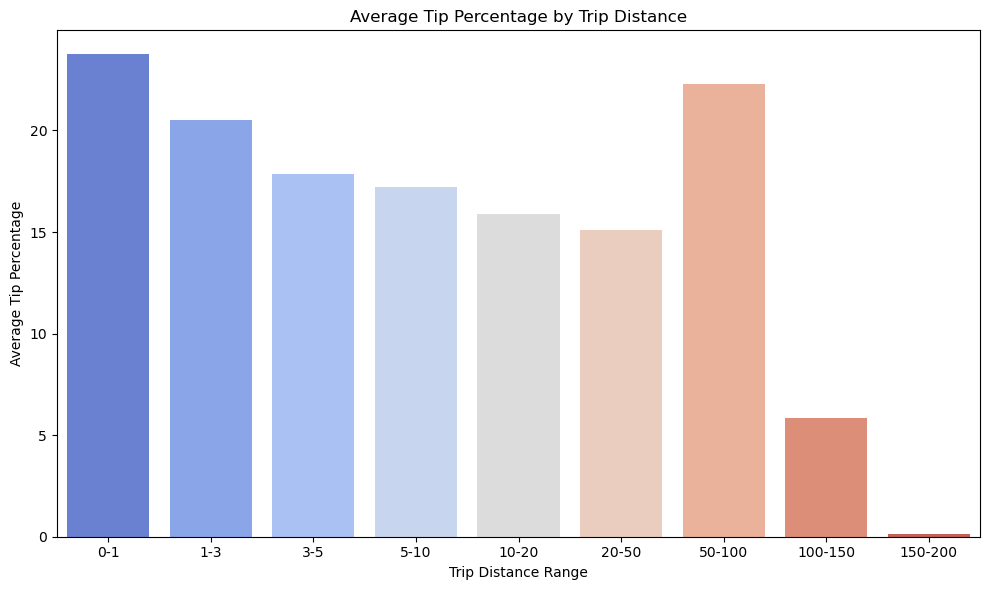

In [524]:
# Create bins for trip distance (you can adjust the bins according to your data)
distance_bins = [0, 1, 3, 5, 10, 20, 50, 100,150,200]  # Example bins: adjust for your data
distance_labels = ['0-1', '1-3', '3-5', '5-10', '10-20', '20-50','50-100','100-150','150-200']
valid_trips['distance_bin'] = pd.cut(valid_trips['trip_distance'], bins=distance_bins, labels=distance_labels)

# Calculate average tip percentage by distance bin
tip_distance = valid_trips.groupby('distance_bin')['tip_percentage'].mean().reset_index()

# Plot the results
plt.figure(figsize=(10,6))
sns.barplot(data=tip_distance, x='distance_bin', y='tip_percentage', palette='coolwarm')
plt.title("Average Tip Percentage by Trip Distance")
plt.xlabel("Trip Distance Range")
plt.ylabel("Average Tip Percentage")
plt.tight_layout()
plt.show()

C:\Users\gaurav\AppData\Local\Temp\ipykernel_19344\4049575196.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=tip_passenger, x='passenger_count', y='tip_percentage', marker='o', palette='viridis')


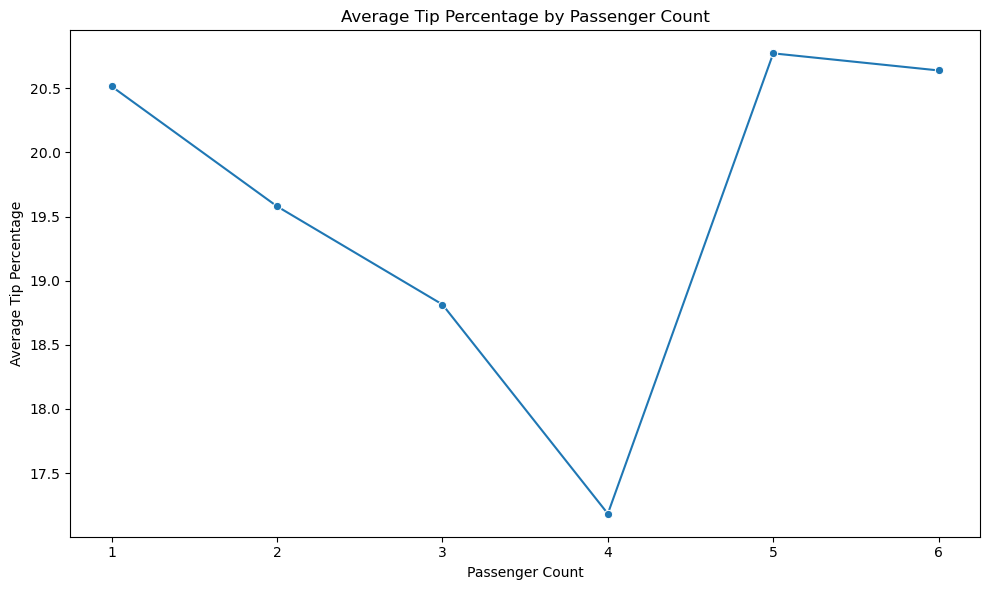

In [526]:
# Group by passenger count and calculate the average tip percentage
tip_passenger = valid_trips.groupby('passenger_count')['tip_percentage'].mean().reset_index()

# Plot the results
plt.figure(figsize=(10,6))
sns.lineplot(data=tip_passenger, x='passenger_count', y='tip_percentage', marker='o', palette='viridis')
plt.title("Average Tip Percentage by Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Average Tip Percentage")
plt.tight_layout()
plt.show()

C:\Users\gaurav\AppData\Local\Temp\ipykernel_19344\1618947401.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=tip_hour, x='hour', y='tip_percentage', marker='o', palette='magma')


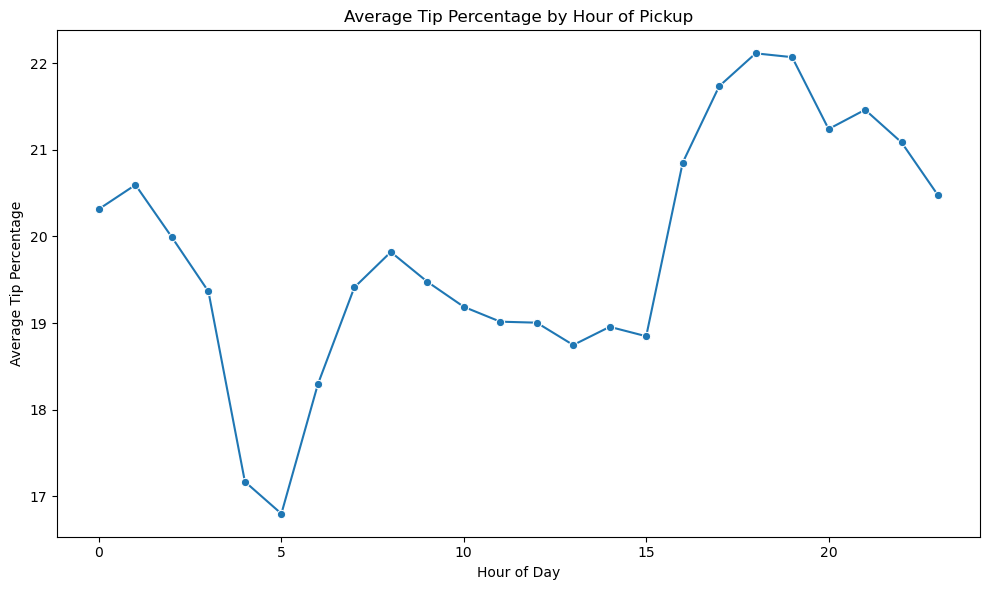

In [528]:
# Group by hour of pickup and calculate the average tip percentage
tip_hour = valid_trips.groupby('hour')['tip_percentage'].mean().reset_index()

# Plot the results
plt.figure(figsize=(10,6))
sns.lineplot(data=tip_hour, x='hour', y='tip_percentage', marker='o', palette='magma')
plt.title("Average Tip Percentage by Hour of Pickup")
plt.xlabel("Hour of Day")
plt.ylabel("Average Tip Percentage")
plt.tight_layout()
plt.show()


C:\Users\gaurav\AppData\Local\Temp\ipykernel_19344\683610045.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=valid_trips, x='passenger_count', palette='viridis')


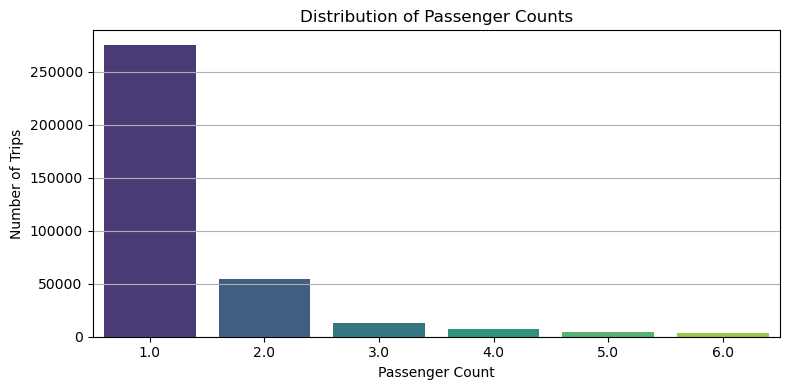

In [530]:
plt.figure(figsize=(8, 4))
sns.countplot(data=valid_trips, x='passenger_count', palette='viridis')
plt.title('Distribution of Passenger Counts')
plt.xlabel('Passenger Count')
plt.ylabel('Number of Trips')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [544]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
low_tip = valid_trips[valid_trips['tip_percentage'] < 10]
high_tip = valid_trips[valid_trips['tip_percentage'] > 25]
comparison = pd.DataFrame({
    "Avg Trip Distance": [low_tip['trip_distance'].mean(), high_tip['trip_distance'].mean()],

}, index=['Tip < 10%', 'Tip > 25%'])

print(comparison)


           Avg Trip Distance
Tip < 10%           3.870477
Tip > 25%           2.322034


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

<Figure size 1200x600 with 0 Axes>

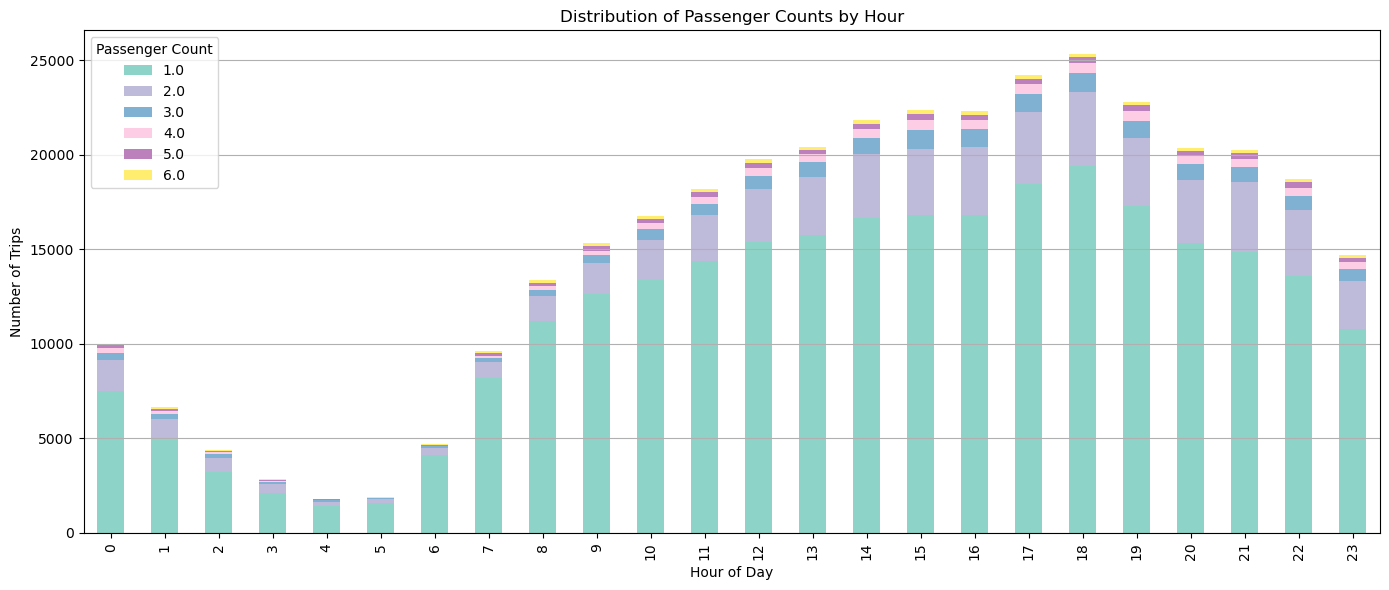

In [546]:
passenger_distribution = merged_df.groupby(['hour', 'passenger_count']).size().unstack(fill_value=0)

plt.figure(figsize=(12,6))
passenger_distribution.plot(kind='bar', stacked=True, colormap='Set3', figsize=(14,6))
plt.title("Distribution of Passenger Counts by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.legend(title="Passenger Count")
plt.grid(axis='y')
plt.tight_layout()
plt.show()




C:\Users\gaurav\AppData\Local\Temp\ipykernel_19344\2239513510.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=merged_df, x='hour', y='passenger_count', palette='tab10')
C:\Users\gaurav\AppData\Local\Temp\ipykernel_19344\2239513510.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Passenger Count', bbox_to_anchor=(1.05, 1), loc='upper left')
C:\Users\gaurav\AppData\Local\Temp\ipykernel_19344\2239513510.py:7: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\gaurav\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


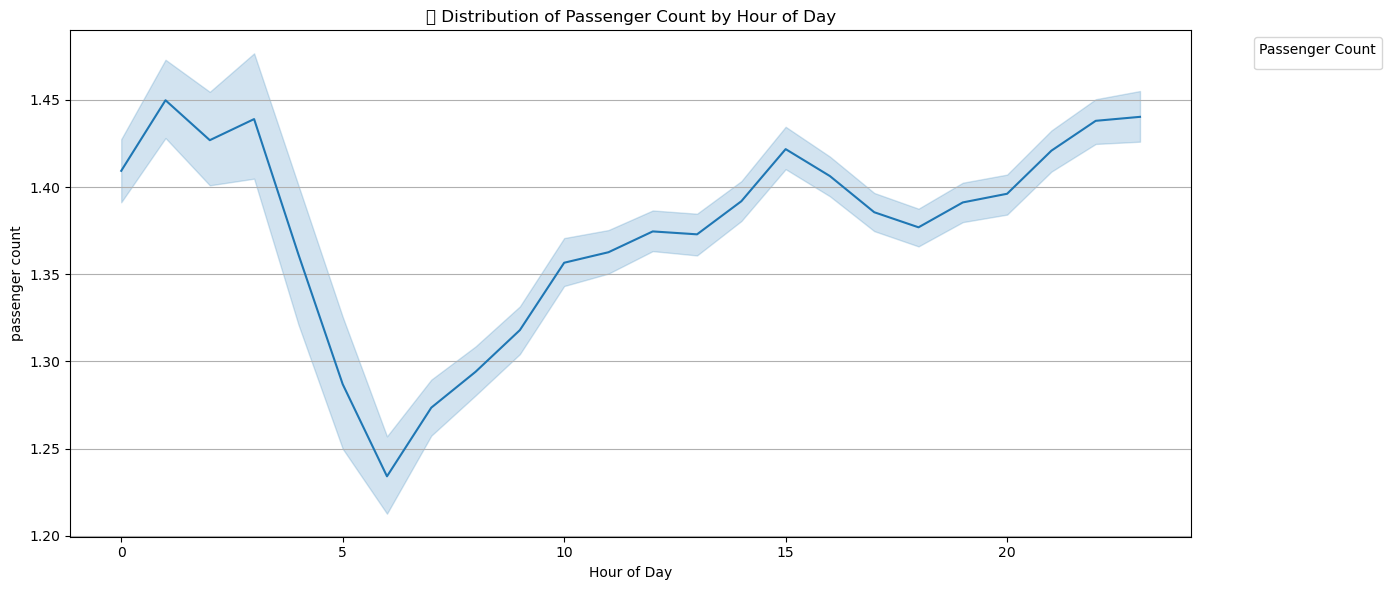

In [548]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=merged_df, x='hour', y='passenger_count', palette='tab10')
plt.title("📅 Distribution of Passenger Count by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("passenger count")
plt.legend(title='Passenger Count', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

C:\Users\gaurav\AppData\Local\Temp\ipykernel_19344\1347461575.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=daily_passenger, x='week', y='passenger_count', palette='viridis')


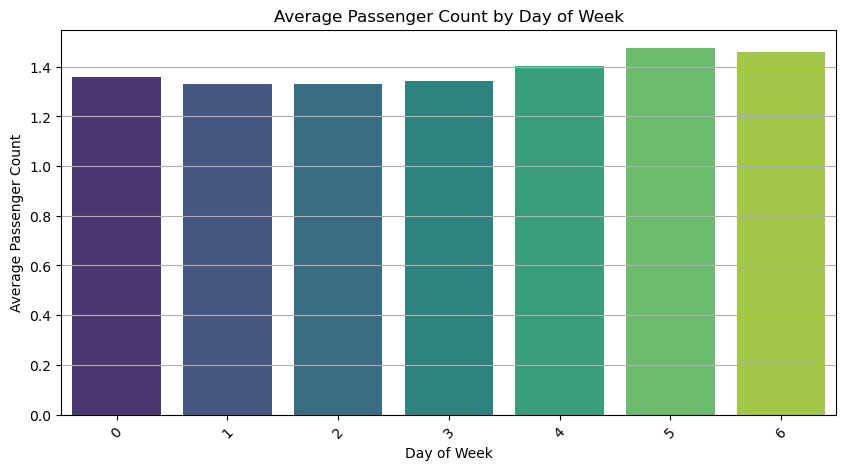

In [550]:
# Optional: reorder weekdays
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
merged_df['weekday'] = pd.Categorical(merged_df['week'], categories=days_order, ordered=True)

daily_passenger = merged_df.groupby('week')['passenger_count'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=daily_passenger, x='week', y='passenger_count', palette='viridis')
plt.title("Average Passenger Count by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Passenger Count")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


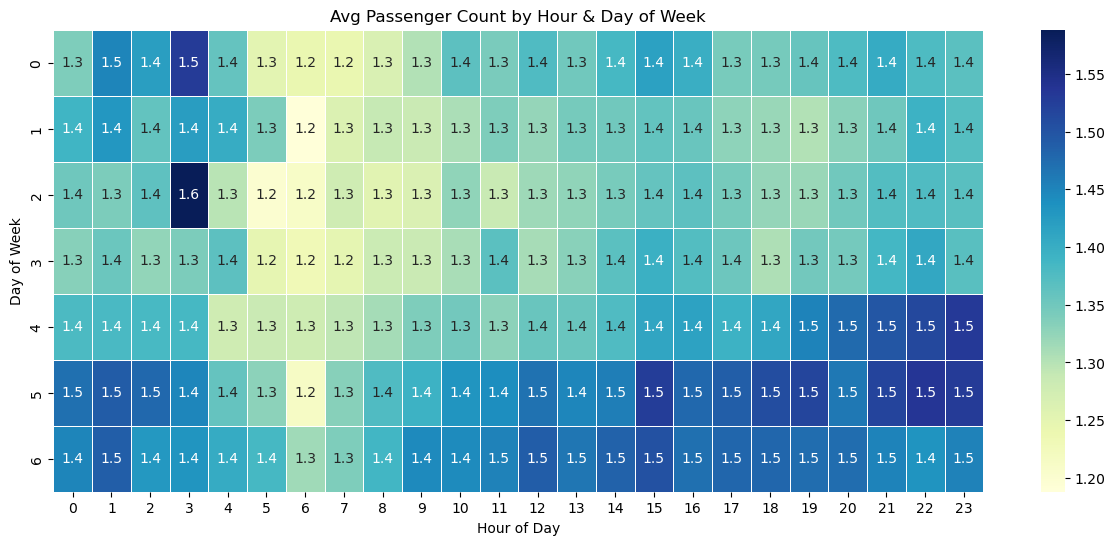

In [552]:
pivot = merged_df.pivot_table(index='week', columns='hour', values='passenger_count', aggfunc='mean')

plt.figure(figsize=(15,6))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5)
plt.title("Avg Passenger Count by Hour & Day of Week")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones



In [554]:

# Group by 'zone' and calculate the average passenger count
zone_passenger_avg = merged_df.groupby('zone')['passenger_count'].mean().reset_index()

# Sort by average passenger count for better visualization
zone_passenger_avg = zone_passenger_avg.sort_values('passenger_count', ascending=False)

# Plot the average passenger count by zone
plt.figure(figsize=(14,6))
sns.barplot(data=zone_passenger_avg, x='zone', y='passenger_count', palette='viridis')
plt.title("🚖 Average Passenger Count per Zone")
plt.xlabel("Zone")
plt.ylabel("Average Passenger Count")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\gaurav\AppData\Local\Temp\ipykernel_19344\2281449612.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=zone_passenger_avg, x='zone', y='passenger_count', palette='viridis')
C:\Users\gaurav\AppData\Local\Temp\ipykernel_19344\2281449612.py:15: UserWarning: Glyph 128662 (\N{ONCOMING TAXI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\gaurav\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128662 (\N{ONCOMING TAXI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


C:\Users\gaurav\AppData\Local\Temp\ipykernel_19344\262288410.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_zones_avg, x='zone', y='passenger_count', palette='viridis')
C:\Users\gaurav\AppData\Local\Temp\ipykernel_19344\262288410.py:11: UserWarning: Glyph 128662 (\N{ONCOMING TAXI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\gaurav\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128662 (\N{ONCOMING TAXI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


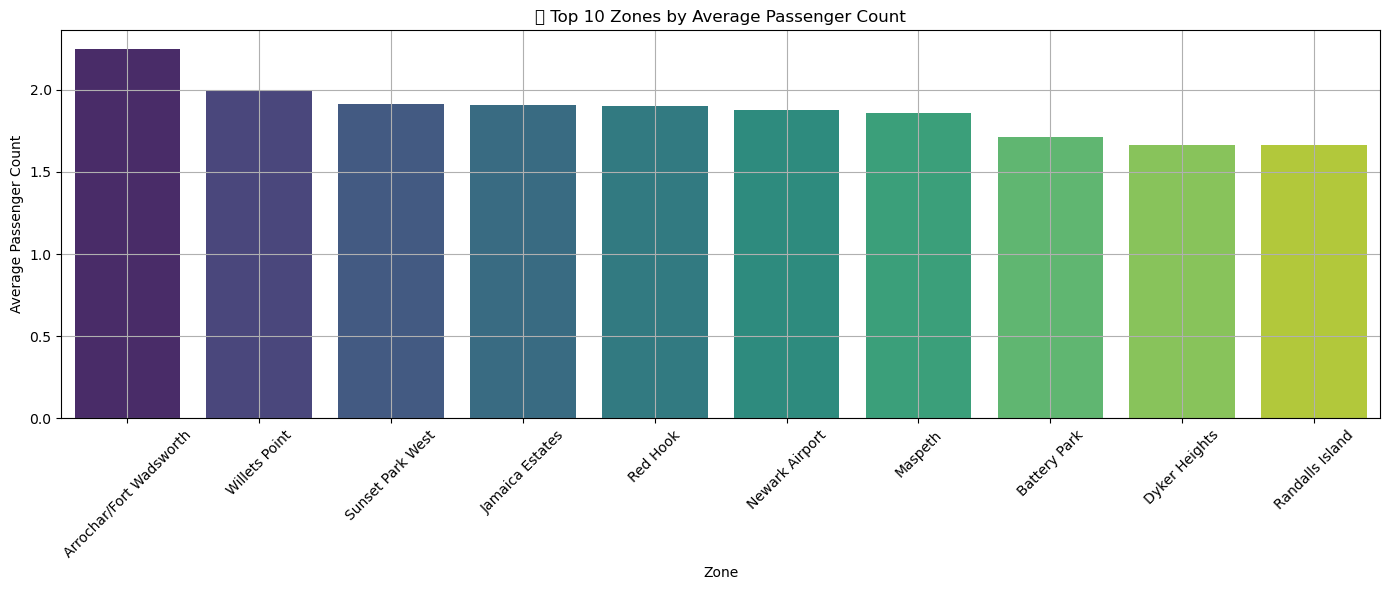

In [556]:
top_zones_avg = zone_passenger_avg.head(10)

# Plot the top 10 zones by average passenger count
plt.figure(figsize=(14,6))
sns.barplot(data=top_zones_avg, x='zone', y='passenger_count', palette='viridis')
plt.title("🚖 Top 10 Zones by Average Passenger Count")
plt.xlabel("Zone")
plt.ylabel("Average Passenger Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.





In [558]:
average_passenger_count = merged_df.groupby('zone')['passenger_count'].mean().reset_index()

average_passenger_count = average_passenger_count.rename(columns={'passenger_count': 'avg_passenger_count'})

In [560]:
zones_with_trips = zones_with_trips.merge(average_passenger_count, on='zone', how='left')

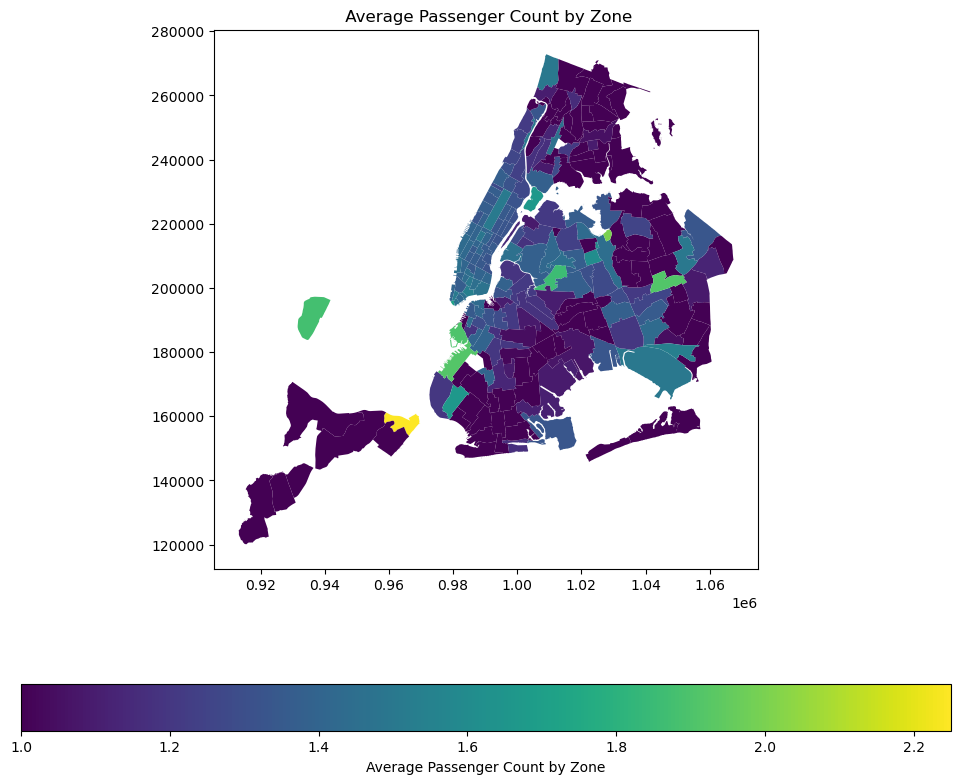

In [562]:
fig, ax = plt.subplots(figsize=(12, 10))
zones_with_trips.plot(column='avg_passenger_count', ax=ax, legend=True,
                      legend_kwds={'label': "Average Passenger Count by Zone",
                                   'orientation': "horizontal"})
ax.set_title(" Average Passenger Count by Zone")
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

In [566]:
surcharge_cols = ['extra', 'mta_tax', 'congestion_surcharge', 'combined_airport_fee']

In [568]:
total_trips = len(valid_trips)

# Calculate percentage of trips with >0 charge for each column
for col in surcharge_cols:
    count = (valid_trips[col] > 0).sum()
    percent = (count / total_trips) * 100
    print(f"{col}: Applied in {count:,} trips ({percent:.2f}%)")

extra: Applied in 222,954 trips (62.29%)
mta_tax: Applied in 355,772 trips (99.40%)
congestion_surcharge: Applied in 333,249 trips (93.11%)
combined_airport_fee: Applied in 31,351 trips (8.76%)


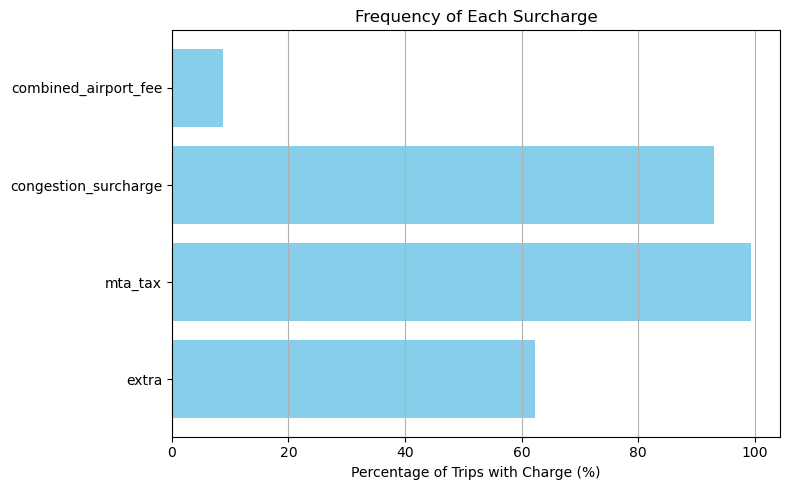

In [570]:
surcharge_stats = {
    col: (valid_trips[col] > 0).mean() * 100 for col in surcharge_cols
}

plt.figure(figsize=(8, 5))
plt.barh(list(surcharge_stats.keys()), list(surcharge_stats.values()), color='skyblue')
plt.xlabel('Percentage of Trips with Charge (%)')
plt.title('Frequency of Each Surcharge')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# How often is each surcharge applied?



In [580]:
# Create a new column to flag trips with extra charges
merged_df['has_extra_charge'] = (merged_df['extra'] > 0) | (merged_df['congestion_surcharge'] > 0) | (merged_df['improvement_surcharge'] > 0) | (merged_df['tolls_amount'] > 0)

# Group by pickup zone (PULocationID) and calculate the percentage of trips with extra charges
pickup_zone_extra = merged_df.groupby('PULocationID')['has_extra_charge'].mean().reset_index()

# Group by dropoff zone (DOLocationID) and calculate the percentage of trips with extra charges
dropoff_zone_extra = merged_df.groupby('DOLocationID')['has_extra_charge'].mean().reset_index()

# Sort to get the most frequent zones with extra charges
pickup_zone_extra = pickup_zone_extra.sort_values(by='has_extra_charge', ascending=False).reset_index(drop=True)
dropoff_zone_extra = dropoff_zone_extra.sort_values(by='has_extra_charge', ascending=False).reset_index(drop=True)

# Display the most frequent pickup and dropoff zones with extra charges
print("Top Pickup Zones with Extra Charges:")
print(pickup_zone_extra.head(10))

print("\nTop Dropoff Zones with Extra Charges:")
print(dropoff_zone_extra.head(10))


Top Pickup Zones with Extra Charges:
   PULocationID  has_extra_charge
0             1               1.0
1           182               1.0
2           168               1.0
3           169               1.0
4           170               1.0
5           171               1.0
6           173               1.0
7           174               1.0
8           175               1.0
9           177               1.0

Top Dropoff Zones with Extra Charges:
   DOLocationID  has_extra_charge
0             1               1.0
1           183               1.0
2           170               1.0
3           171               1.0
4           172               1.0
5           173               1.0
6           174               1.0
7           175               1.0
8           176               1.0
9           177               1.0


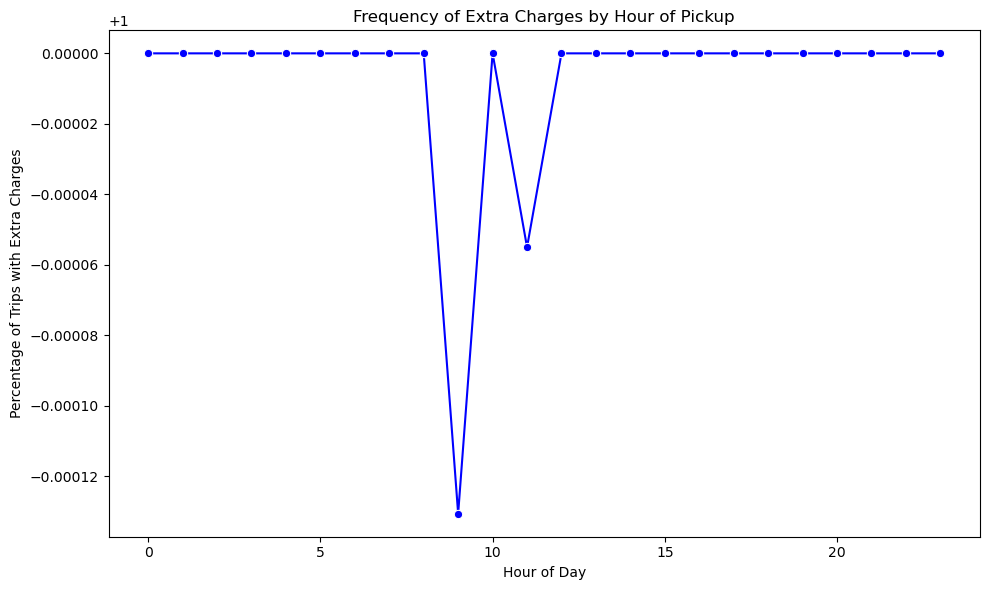

In [574]:
# Create a flag indicating extra charges for trips
merged_df['has_extra_charge'] = (merged_df['extra'] > 0) | (merged_df['congestion_surcharge'] > 0) | (merged_df['improvement_surcharge'] > 0) | (merged_df['tolls_amount'] > 0)

# Group by hour of pickup and calculate the percentage of trips with extra charges
extra_by_hour = merged_df.groupby('hour')['has_extra_charge'].mean().reset_index()

# Plot the results
plt.figure(figsize=(10,6))
sns.lineplot(data=extra_by_hour, x='hour', y='has_extra_charge', marker='o', color='blue')
plt.title("Frequency of Extra Charges by Hour of Pickup")
plt.xlabel("Hour of Day")
plt.ylabel("Percentage of Trips with Extra Charges")
plt.tight_layout()
plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
 #Peak Hour Patterns (Ref: Section 3.2.13 - Variation of Passenger Count by Hour & Day)
Insight: The analysis of passenger count across hours of the day showed sharp increases in demand during morning (7–9 AM) and 
evening commute times (4–7 PM).

Recommendation:

Prioritize fleet availability in high-demand zones during these peak periods.

Implement time-based routing shifts to dynamically position taxis before peak hours begin.
#Passenger Count Patterns:

Most trips have 1–2 passengers, suggesting solo or pair-based urban travel dominates.

Slight spikes in passenger count were observed during weekends and evenings, possibly due to social outings.

#Trip Duration and  Outliers:

Average trip duration is around 17 mins, but extreme outliers (over 5000 mins) skew the distribution.

Trips longer than 3 hours were considered outliers and removed for cleaner analysis.

#Tip Percentage Behavior:

Tips below 10% were often associated with shorter trips, lower fares, and early morning/late-night rides.

Higher tips (>25%) are typically given during afternoon/evening rides, longer trips, and possibly in better-serviced zones.

#Zone-Level Demand Distribution (Ref: Section 3.2.12 - Pickup/Dropoff Zones with Extra Charges)
Insight: Zones like Midtown Manhattan and JFK Airport consistently show high pickup frequencies and 
frequent surcharges (indicating busy traffic or high demand).

Recommendation:

Implement geo-fencing for high-demand zones and maintain a fixed number of standby vehicles in these areas.

Create routing templates optimized per borough/zone to reduce empty miles.

#Time-of-Day Demand Patterns:

Morning peaks (7–9 AM) and evening peaks (4–7 PM) reflect commuter traffic.

Late-night activity (10 PM–1 AM) increases on weekends.
#Weekday vs. Weekend Trends (Ref: Section 3.2.13 & 3.2.15)
Insight: Weekdays show a concentration of trips around business districts, while weekends show more activity near entertainment zones.

Recommendation:

Use demand forecasting models to plan weekend deployments around nightlife and tourist-heavy locations.

Adopt a weekday vs. weekend dispatch algorithm to reduce idle time in low-demand regions.



#Surcharge & Extra Charges:

Extra charges are more frequently applied during rush hours and in certain high-traffic zones.

Congestion surcharge and improvement surcharge are nearly always present in peak-time travel.
###Recommendations to Optimize Routing & Dispatching
#Time-Aware Routing:

Use peak-hour trends to pre-position taxis in high-demand areas (e.g., midtown Manhattan in the evening).

Route drivers proactively toward demand clusters identified during high congestion windows.

#Zone Prioritization:

Prioritize frequent pickup zones (e.g., airports, Penn Station, Times Square) with extra taxis during demand surges.

Use heatmaps to allocate vehicles dynamically.

#Trip Filtering & Efficiency:

Flag trips with long idle durations or unusually high durations as potential operational inefficiencies.

Introduce alerts or incentives to reduce time between drop-off and next pickup.

#Optimize for Tip Maximization:

Encourage drivers to target afternoon/evening trips in longer-distance zones to maximize tips.

Tip analytics can be used to reward high-performance drivers or tweak service training.


 



**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
 Data-Driven Cab Deployment Strategy:
#Time-Based Cab Positioning:

Morning Rush (7–9 AM): Position more cabs in residential zones (e.g., outer boroughs like Queens and Brooklyn) as people travel to work.

Evening Rush (4–7 PM): Shift cabs toward commercial and downtown zones (e.g., Midtown, Wall Street, SoHo), as people head home or go out.

Late Night (10 PM–2 AM): Focus deployments around nightlife and dining zones such as Lower Manhattan, Brooklyn’s Williamsburg, etc., especially on weekends.

#Day-Based Deployment Adjustments:

Weekdays: Emphasize consistent rush hour zones and business-heavy areas.

Weekends: Increase cab density in tourist zones, parks, and event-heavy venues (Central Park, Times Square, Yankee Stadium, etc.).

#Monthly/Seasonal Strategy:

During holiday seasons (Nov–Dec), downtown shopping districts show increased demand — deploy additional cabs near Macy’s, Fifth Ave, and Union Square.

In summer months, routes to airports and beach zones (e.g., Coney Island) need more coverage.

#Zone Hotspot-Based Positioning:

Use zone-level trip heatmaps to determine high-frequency PULocationID and DOLocationID pairs.

Position cabs proactively around transport hubs like JFK, LGA, Penn Station, and Port Authority.

#Idle Reduction via Dynamic Relocation:

If cabs are idle for extended periods in low-demand zones, implement a dispatch rule that suggests relocation to neighboring high-demand zones using real-time demand monitoring.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
###Optimizing Revenue with Smart Pricing Tactics
#Implement Time-of-Day Pricing Adjustments:

Increase base fares or surcharges during peak hours (e.g., 7–9 AM, 4–7 PM), especially in high-traffic zones like Midtown Manhattan.

Apply off-peak discounts to incentivize ridership during lull periods (e.g., mid-morning or late night on weekdays).

#Dynamic Pricing by Zone Demand:

Adjust fare multipliers for popular pickup zones during periods of heavy demand or low cab availability.

Zones like airports, tourist districts, and event venues can sustain slight fare increases during peak events or holidays.

#Distance-Tiered Fare Incentives:

Shorter trips tend to generate lower tips. Introduce flat-rate pricing bands for trips < 2 miles to encourage quick-turn trips.

Offer discounts on return/round trips from the same pickup zone to optimize cab idle time and utilization.

#Tip-Based Driver Incentive Model:

Reward drivers with higher platform commission or bonuses for maintaining a high average tip percentage.

Helps improve customer service and rider satisfaction.

#Seasonal/Weather-Based Fare Adjustments:

Apply temporary fare increases during extreme weather, snowstorms, or heavy rain, when demand spikes and cab availability drops.

#Competitive Price Monitoring:

Regularly compare pricing trends against ride-hailing competitors (Uber, Lyft).

Keep base rates competitive, but differentiate through service reliability and surge predictability.

